# Capstone Project: PAK DE (Parkinson Detection)

Dataset yang digunakan adalah 2 dataset yang digabungkan, dimana ada 3 jenis kelas setelah dilakukan penggabungan dataset yaitu `spiral`, `wave`, dan `meander`.


**Source:** [HandPD dataset](https://wwwp.fc.unesp.br/~papa/pub/datasets/Handpd/) dan [Hand Drawings](https://data.mendeley.com/datasets/fd5wd6wmdj/1)

## Install Module

In [1]:
%pip install tensorflow

In [2]:
%pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 18.1 MB/s eta 0:00:00


## Import Library

In [3]:
# --- Libraries untuk Operasi Dasar dan Sistem File ---
import os  # Untuk berinteraksi dengan sistem operasi, seperti path, direktori
import pathlib  # Untuk bekerja dengan path file dan direktori secara object-oriented (tidak digunakan secara eksplisit di kode yang Anda berikan, tapi umum)
import random  # Untuk menghasilkan angka acak (tidak digunakan secara eksplisit, tapi bisa berguna)
import shutil  # Untuk operasi file tingkat tinggi seperti menyalin dan menghapus folder
import zipfile # Untuk bekerja dengan file ZIP (tidak digunakan secara eksplisit karena Anda menggunakan !unzip)

# --- Libraries untuk Manipulasi Data dan Numerik ---
import numpy as np  # Fundamental package untuk komputasi numerik, terutama array multidimensi
import pandas as pd  # Untuk analisis dan manipulasi data, terutama struktur data seperti DataFrame
from tqdm.notebook import tqdm as tq  # Untuk menampilkan progress bar yang interaktif di notebook Jupyter/Colab

# --- Libraries Spesifik Google Colab ---
# from google.colab import files # Untuk upload/download file di Colab (tidak digunakan di kode terakhir)
from google.colab import drive # Untuk me-mount Google Drive di Colab

# --- Libraries untuk Visualisasi Data ---
# %matplotlib inline # Magic command Jupyter untuk menampilkan plot matplotlib secara inline
import matplotlib.pyplot as plt  # Library utama untuk membuat plot dan visualisasi statis, animasi, dan interaktif
import seaborn as sns  # Library visualisasi data berbasis matplotlib, menyediakan antarmuka tingkat tinggi untuk grafik statistik yang menarik

# --- Libraries untuk Pemrosesan Gambar dan Machine Learning ---
from PIL import Image  # Python Imaging Library (Pillow fork) untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar
from collections import Counter # Untuk menghitung frekuensi item dalam sebuah list (digunakan untuk mengecek channel warna)

# --- TensorFlow dan Keras (untuk Deep Learning) ---
import tensorflow as tf  # Platform open-source end-to-end untuk machine learning
from tensorflow.keras.applications import MobileNetV2  # Model MobileNetV2 yang sudah terlatih (pre-trained) untuk transfer learning
from tensorflow.keras import layers, models, callbacks, optimizers  # Komponen-komponen untuk membangun dan melatih model Keras:
                                                                  # layers: Blok bangunan model (Dense, Dropout, Conv2D, dll.)
                                                                  # models: API untuk membuat model (Sequential, Functional)
                                                                  # callbacks: Fungsi yang dipanggil selama pelatihan (EarlyStopping, ReduceLROnPlateau)
                                                                  # optimizers: Algoritma untuk mengoptimalkan model (Adam, SGD)
from tensorflow.keras.regularizers import l2  # Untuk menerapkan regularisasi L2 (weight decay) pada bobot layer
from tensorflow.keras.preprocessing import image # Utilitas untuk preprocessing gambar sebelum dimasukkan ke model Keras (misalnya, load_img, img_to_array)

# --- Scikit-learn (untuk utilitas Machine Learning) ---
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi set latih dan tes (atau validasi)
from sklearn.utils import class_weight  # Untuk menghitung bobot kelas guna menangani dataset yang tidak seimbang
from sklearn.metrics import confusion_matrix, classification_report  # Untuk mengevaluasi performa model klasifikasi

# --- MLflow (untuk Manajemen Eksperimen Machine Learning) ---
import mlflow  # Platform open-source untuk mengelola siklus hidup machine learning, termasuk pelacakan eksperimen
import mlflow.tensorflow  # Modul MLflow untuk integrasi dengan TensorFlow/Keras

# --- Lain-lain ---
import tempfile  # Untuk membuat file dan direktori sementara

# --- Mengabaikan Peringatan untuk output yang lebih bersih ---
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Tahap 1: Konfigurasi Dasar dan Pemuatan Data Awal

In [4]:
# Mount Google Drive (hanya jika menggunakan Colab)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Konfigurasi Dasar

In [5]:
# Konfigurasi Dasar
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

### Data Loading

In [6]:
# Path ke folder dataset di Google Drive
drive_path = '/content/drive/MyDrive/'
project_folder = 'parkinson' # Nama folder proyek di Drive
dataset_name_zip = 'parkinson_dataset.zip' # Nama file zip
extracted_dataset_folder_name = 'parkinson_dataset' # Nama folder setelah diekstrak

dataset_base_path = os.path.join(drive_path, project_folder)
zip_file_path = os.path.join(dataset_base_path, dataset_name_zip)
dataset_dir = os.path.join(dataset_base_path, extracted_dataset_folder_name) # Path ke folder dataset yang sudah diekstrak
base_path_split = os.path.join(dataset_base_path, 'split_data') # Path untuk menyimpan data yang sudah di-split

In [ ]:
# Direktori tujuan untuk mengesktrak isi zip
if not os.path.exists(dataset_dir):
    print(f"Mengekstrak: '{zip_file_path}' ke '{dataset_base_path}'")
    if os.path.exists(zip_file_path):
        # Perintah unzip untuk Colab
        !unzip -q "{zip_file_path}" -d "{dataset_base_path}"
        print(f"File '{dataset_name_zip}' berhasil diekstrak ke: {dataset_base_path}")
    else:
        print(f"File ZIP '{dataset_name_zip}' tidak ditemukan di: {zip_file_path}")
else:
    print(f"Folder dataset '{dataset_dir}' sudah ada.")

Folder dataset '/content/drive/MyDrive/parkinson/parkinson_dataset' sudah ada.


### 1.1. Mengumpulkan Path Gambar dan Label Awal untuk EDA

In [7]:
all_file_paths_eda = []
all_labels_initial_eda = []
all_labels_main_eda = []
image_modes_eda = []
image_sizes_eda = {}

sub_folders = ['meander', 'spiral', 'wave']
categories = ['healthy', 'parkinson']

for sub_folder in sub_folders:
    image_sizes_eda[sub_folder] = {'healthy': [], 'parkinson': []}
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and not filename.startswith('.'): # Hindari file tersembunyi
                    img_path = os.path.join(folder_path, filename)
                    all_file_paths_eda.append(img_path)
                    all_labels_initial_eda.append(f"{category} ({sub_folder})")
                    all_labels_main_eda.append(category)
                    try:
                        with Image.open(img_path) as img:
                            image_modes_eda.append(img.mode)
                            image_sizes_eda[sub_folder][category].append(img.size)
                    except Exception as e:
                        print(f"Gagal membaca info gambar {img_path}: {e}")
        else:
            print(f"Folder tidak ditemukan atau bukan direktori: {folder_path}")

if not all_file_paths_eda:
    raise ValueError("Tidak ada file gambar yang ditemukan untuk EDA. Periksa path dataset_dir dan struktur folder.")

df_eda = pd.DataFrame({
    "path": all_file_paths_eda,
    "labels_initial": all_labels_initial_eda,
    "labels_main": all_labels_main_eda
})
print(f"Total gambar ditemukan untuk EDA: {len(df_eda)}")

Total gambar ditemukan untuk EDA: 940


## Tahap 2: Exploratory Data Analysis (EDA)

Pada tahapan ini dilakukan untuk memahami isi dan kualitas dataset sebelum diproses.

### EDA 2.1. Sampel Gambar untuk Semua Kelas dan Jenis

Untuk memahami seperti apa variasi visual dari tiap kelas  (healthy vs parkinson) dalam jenis gambar (spiral, wave, meander).

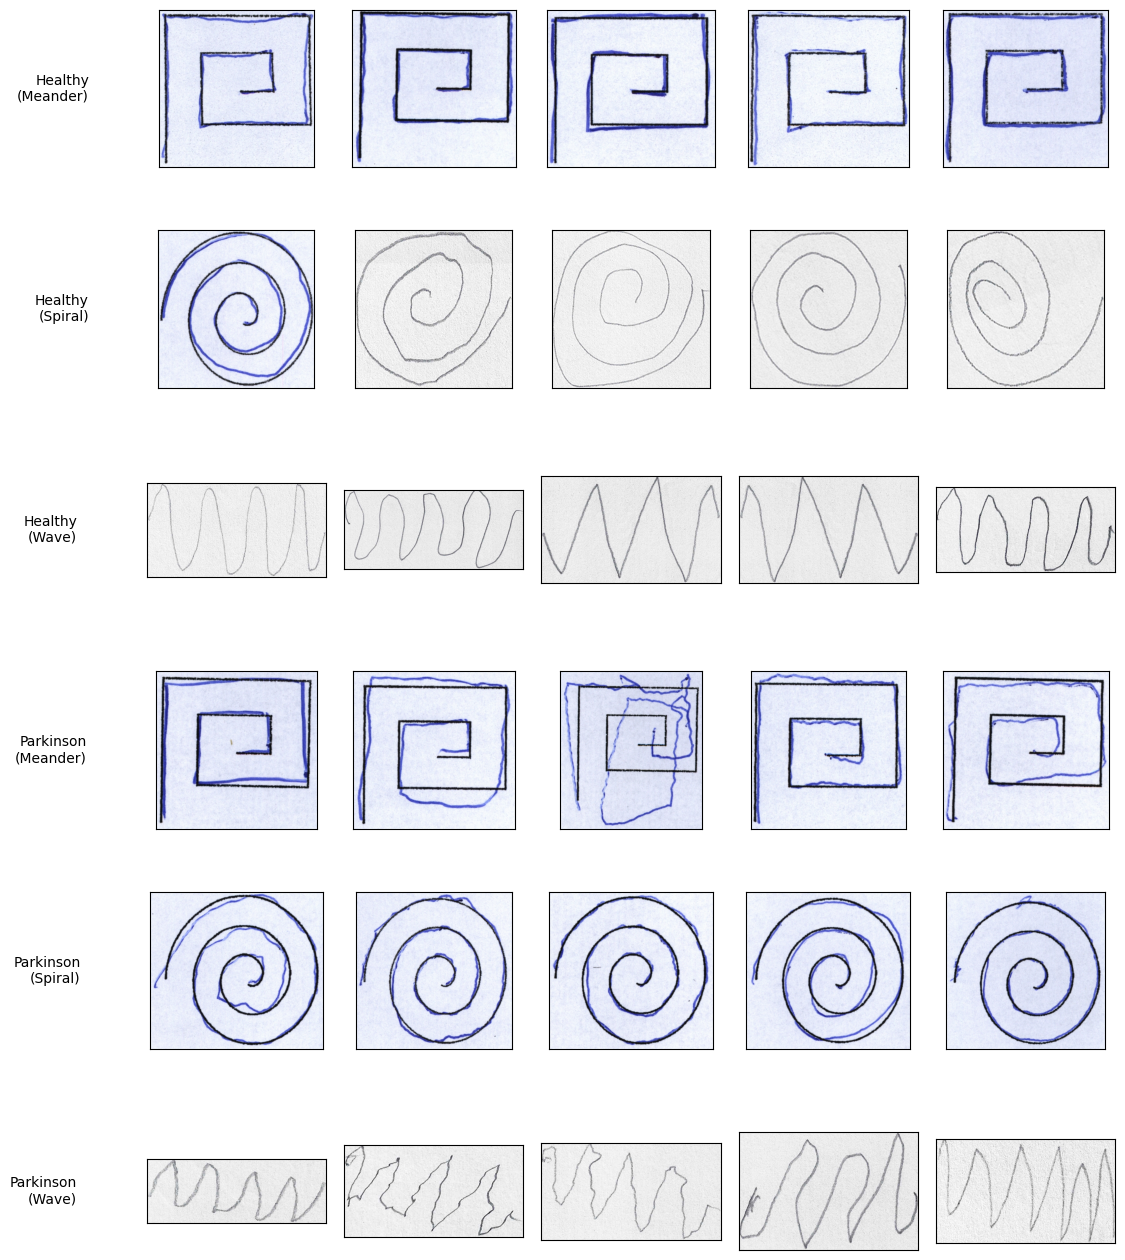

In [8]:
num_samples_to_display = 5
all_images_by_category_plot = {}
for sub_folder in sub_folders:
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            image_files = [
                f for f in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]
            if image_files:
                key_name = f"{category.capitalize()}\n({sub_folder.capitalize()})"
                all_images_by_category_plot[key_name] = [os.path.join(folder_path, fname) for fname in image_files]

sorted_categories_plot = sorted(all_images_by_category_plot.keys())
num_categories_to_plot = len(sorted_categories_plot)

if num_categories_to_plot > 0:
    fig, axs = plt.subplots(num_categories_to_plot, num_samples_to_display,
                            figsize=(num_samples_to_display * 2.5, num_categories_to_plot * 2.5))
    if num_categories_to_plot == 1: axs = np.array([axs])
    if num_samples_to_display == 1 and num_categories_to_plot > 1: axs = axs.reshape(-1, 1)
    elif num_samples_to_display == 1 and num_categories_to_plot == 1: axs = np.array([[axs]])

    for i, category_name in enumerate(sorted_categories_plot):
        image_paths_list = all_images_by_category_plot[category_name]
        if image_paths_list:
            selected_image_paths = np.random.choice(image_paths_list,
                                                    min(num_samples_to_display, len(image_paths_list)),
                                                    replace=False)
            if num_samples_to_display > 0 :
                axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display):
                if j < len(selected_image_paths):
                    img_path_plot = selected_image_paths[j]
                    try:
                        img_plot = Image.open(img_path_plot).convert('RGB')
                        axs[i, j].imshow(img_plot)
                    except Exception: axs[i, j].set_title("Error", fontsize=8)
                else: axs[i,j].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=10)
                axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
        else:
            if num_samples_to_display > 0: axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display): axs[i,j].text(0.5, 0.5, 'No Images', ha='center', va='center', fontsize=10); axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
    plt.subplots_adjust(hspace=0.4, wspace=0.1, top=0.95); plt.show()
else:
    print("Tidak ada data gambar untuk sampel EDA.")

### EDA 2.2. Distribusi Gambar per Kelas Utama (Healthy vs Parkinson)

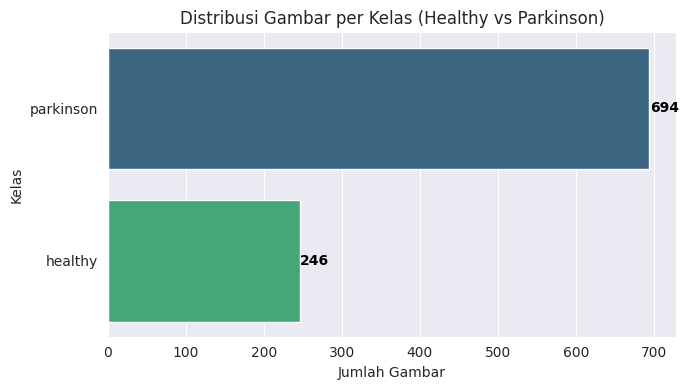


Jumlah Gambar per Kelas (Healthy vs Parkinson):
 labels_main
parkinson    694
healthy      246
Name: count, dtype: int64


In [9]:
label_counts_main_eda = df_eda['labels_main'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")
ax = sns.countplot(y='labels_main', data=df_eda, order=label_counts_main_eda.index, palette="viridis")
plt.title('Distribusi Gambar per Kelas (Healthy vs Parkinson)')
plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas')
for i, v in enumerate(label_counts_main_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
plt.tight_layout(); plt.show()
print("\nJumlah Gambar per Kelas (Healthy vs Parkinson):\n", label_counts_main_eda)

### EDA 2.3. Distribusi Gambar per Kelas dan Jenis

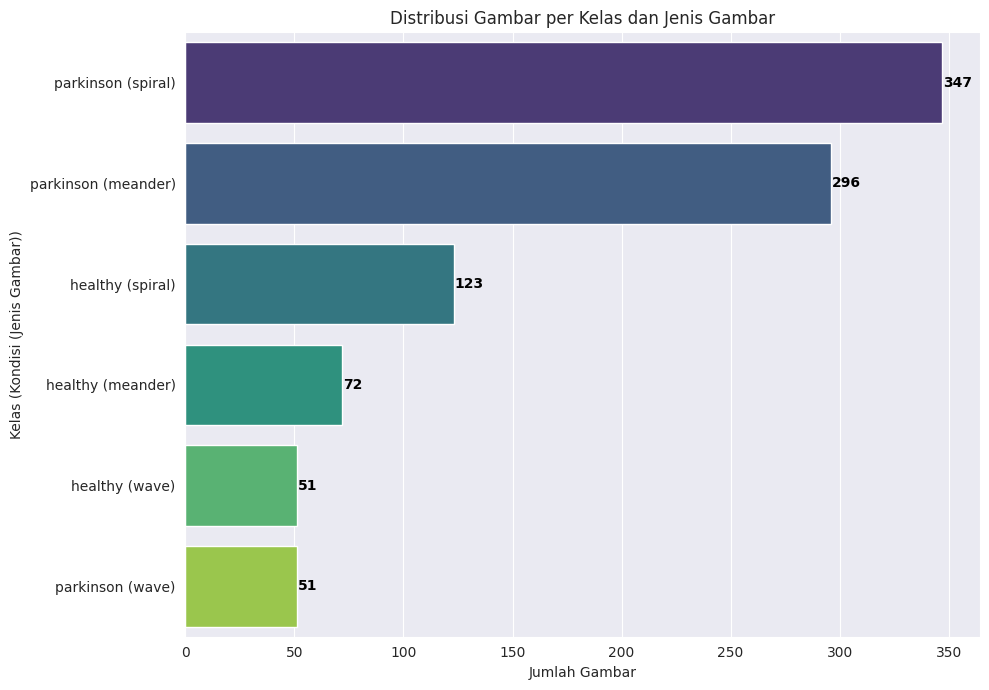


Jumlah Gambar per Kelas dan Jenis:
 labels_initial
parkinson (spiral)     347
parkinson (meander)    296
healthy (spiral)       123
healthy (meander)       72
healthy (wave)          51
parkinson (wave)        51
Name: count, dtype: int64


In [10]:
label_counts_detailed_eda = df_eda['labels_initial'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 7))
n_labels_detailed_eda = len(label_counts_detailed_eda)
if n_labels_detailed_eda > 0:
    palette_detailed_eda = sns.color_palette("viridis", n_colors=n_labels_detailed_eda)
    sns.set_style("darkgrid")
    ax = sns.countplot(y='labels_initial', data=df_eda, order=label_counts_detailed_eda.index, palette=palette_detailed_eda)
    plt.title('Distribusi Gambar per Kelas dan Jenis Gambar')
    plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas (Kondisi (Jenis Gambar))')
    for i, v in enumerate(label_counts_detailed_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
    plt.tight_layout(); plt.show()
    print("\nJumlah Gambar per Kelas dan Jenis:\n", label_counts_detailed_eda)
else:
    print("Tidak ada label_initial di df_eda.")

### EDA 2.4. Pengecekan Ukuran Gambar

In [11]:
for sub_folder_key, categories_data in image_sizes_eda.items():
    for category_key, sizes_list in categories_data.items():
        if sizes_list:
            unique_sizes = set(sizes_list)
            print(f"Ukuran gambar unik untuk ('{sub_folder_key}', '{category_key}'): {len(unique_sizes)}")
            if len(unique_sizes) < 10: print(f"   Contoh ukuran: {list(unique_sizes)[:5]}")
        else:
            print(f"Tidak ada ukuran gambar untuk ('{sub_folder_key}', '{category_key}')")

Ukuran gambar unik untuk ('meander', 'healthy'): 70
Ukuran gambar unik untuk ('meander', 'parkinson'): 280
Ukuran gambar unik untuk ('spiral', 'healthy'): 72
Ukuran gambar unik untuk ('spiral', 'parkinson'): 256
Ukuran gambar unik untuk ('wave', 'healthy'): 31
Ukuran gambar unik untuk ('wave', 'parkinson'): 43


### 2.5. Pengecekan Format Warna

In [12]:
mode_counts_original = Counter(image_modes_eda)
print("Distribusi mode gambar asli dalam dataset:", mode_counts_original)
if 'RGBA' in mode_counts_original or 'P' in mode_counts_original or 'L' in mode_counts_original:
    print("Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.")

Distribusi mode gambar asli dalam dataset: Counter({'RGB': 931, 'RGBA': 9})
Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.


## Tahap 3: Preprocessing Data untuk Model

### 3.1. Pembagian Data (Menggunakan DataFrame dari EDA)

In [13]:
labels_for_split = df_eda['labels_main']
main_df, test_df = train_test_split(df_eda, test_size=0.1, stratify=labels_for_split, random_state=SEED)
train_labels_for_stratify_val = main_df['labels_main']
train_df, val_df = train_test_split(main_df, test_size=0.2, stratify=train_labels_for_stratify_val, random_state=SEED)
print(f"Data latih (df): {len(train_df)}, Validasi (df): {len(val_df)}, Tes (df): {len(test_df)}")

Data latih (df): 676, Validasi (df): 170, Tes (df): 94


### 3.2. Menyalin Gambar ke Folder Split

In [14]:
if os.path.exists(base_path_split):
    print(f"Menghapus folder split_data lama: {base_path_split}")
    shutil.rmtree(base_path_split)
os.makedirs(base_path_split, exist_ok=True)

def copy_images_for_tf_dataset(df_to_copy, split_name_arg, base_path_split_arg): # Ganti nama parameter df
    print(f"Menyalin gambar untuk set {split_name_arg}...")
    for _, row in df_to_copy.iterrows():
        label_folder = row['labels_main']
        dst_dir = os.path.join(base_path_split_arg, split_name_arg, label_folder)
        os.makedirs(dst_dir, exist_ok=True)
        try:
            shutil.copy(row['path'], os.path.join(dst_dir, os.path.basename(row['path'])))
        except Exception as e:
            print(f"Error menyalin {row['path']} ke {dst_dir}: {e}")
    print(f"Selesai menyalin untuk set {split_name_arg}.")

copy_images_for_tf_dataset(train_df, "train", base_path_split)
copy_images_for_tf_dataset(val_df, "val", base_path_split)
copy_images_for_tf_dataset(test_df, "test", base_path_split)

Menghapus folder split_data lama: /content/drive/MyDrive/parkinson/split_data
Menyalin gambar untuk set train...
Selesai menyalin untuk set train.
Menyalin gambar untuk set val...
Selesai menyalin untuk set val.
Menyalin gambar untuk set test...
Selesai menyalin untuk set test.


### 3.3. Load Dataset dengan `tf.data.image_dataset_from_directory`

In [15]:
train_path = os.path.join(base_path_split, 'train')
val_path = os.path.join(base_path_split, 'val')
test_path = os.path.join(base_path_split, 'test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=True, color_mode='rgb'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
class_names_from_tf = train_ds.class_names
print(f"Nama kelas ditemukan oleh TensorFlow: {class_names_from_tf}")

Found 676 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 94 files belonging to 2 classes.
Nama kelas ditemukan oleh TensorFlow: ['healthy', 'parkinson']


### 3.4. Hitung Class Weight

In [16]:
train_labels_for_weights = np.concatenate([y for x, y in train_ds], axis=0)
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(train_labels_for_weights), y=train_labels_for_weights
)
class_map = {name: i for i, name in enumerate(class_names_from_tf)}
class_weight_dict = {
    class_map.get('healthy', 0): class_weights_values[class_map.get('healthy', 0)],
    class_map.get('parkinson', 1): class_weights_values[class_map.get('parkinson', 1)]
}
print(f"Class names dari train_ds: {class_names_from_tf} -> Mapping: {class_map}")
print("Calculated Class Weights:", class_weight_dict)

Class names dari train_ds: ['healthy', 'parkinson'] -> Mapping: {'healthy': 0, 'parkinson': 1}
Calculated Class Weights: {0: np.float64(1.9096045197740112), 1: np.float64(0.6773547094188377)}


### 3.5. Augmentasi Data dan Preprocessing Pipeline untuk Model

In [17]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1)
    ], name="data_augmentation"
)

def apply_augmentation(image, label):
    image = tf.cast(image, tf.float32)
    image = data_augmentation(image, training=True)
    return image, label

def apply_preprocess_for_mobilenetv2(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

train_ds_final = train_ds.map(apply_augmentation, num_parallel_calls=AUTOTUNE)
train_ds_final = train_ds_final.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
val_ds_final = val_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
test_ds_final = test_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)

train_ds_final = train_ds_final.prefetch(buffer_size=AUTOTUNE)
val_ds_final = val_ds_final.prefetch(buffer_size=AUTOTUNE)
test_ds_final = test_ds_final.prefetch(buffer_size=AUTOTUNE)

#### Verifikasi Pipeline

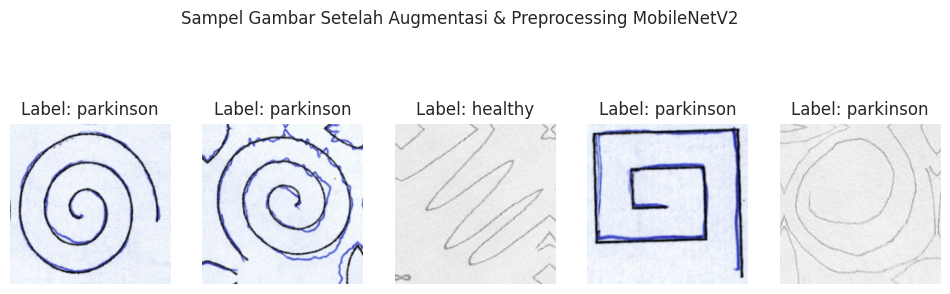

In [18]:
for images, labels in train_ds_final.take(1):
    plt.figure(figsize=(12, 4))
    for i in range(min(5, BATCH_SIZE)):
        ax = plt.subplot(1, 5, i + 1)
        img_display = (images[i].numpy() + 1.0) / 2.0
        img_display = np.clip(img_display, 0, 1)
        plt.imshow(img_display)
        plt.title(f'Label: {class_names_from_tf[labels[i].numpy()]}')
        plt.axis('off')
    plt.suptitle("Sampel Gambar Setelah Augmentasi & Preprocessing MobileNetV2")
    plt.show()
    break

## Tahap 4: Pemodelan dan Pelatihan

In [19]:
param_sets = [
    {
        "run_name": "LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore",
        "initial_lr": 5e-4, "dense_units": 64, "dropout_1": 0.4, "dropout_2": 0.3, "l2_reg": 0.002,
        "epochs": 60, "patience_early_stop": 15, "patience_reduce_lr": 5
    },
]

# Pastikan direktori MLflow ada jika logging lokal (Colab biasanya sudah handle ini)
os.makedirs("./mlruns", exist_ok=True)

best_run_id_overall_loop = None # Untuk menyimpan ID run MLflow terbaik dari loop ini
best_test_accuracy_loop = 0.0   # Inisialisasi dengan 0.0
model_best_in_loop = None       # Untuk menyimpan objek model Keras terbaik dari loop ini

for params in param_sets:
    # Tentukan nama eksperimen di MLflow
    mlflow.set_experiment("Parkinson_Detection_Capstone_Final_Runs") # Sesuaikan nama eksperimen

    with mlflow.start_run(run_name=params["run_name"]) as run: # 'run' terdefinisi di sini
        current_run_id = run.info.run_id # Dapatkan run_id saat ini
        print(f"\n--- Memulai Run MLflow: {params['run_name']} (ID: {current_run_id}) ---")

        # Logging Parameter ke MLflow
        mlflow.log_params(params)
        mlflow.log_param("trainable_base", False)
        mlflow.log_param("batch_size", BATCH_SIZE)

        # Bangun Model
        base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
        base_model.trainable = False

        model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(params["dropout_1"]),
            layers.Dense(params["dense_units"], activation='relu', kernel_regularizer=l2(params["l2_reg"])),
            layers.BatchNormalization(),
            layers.Dropout(params.get("dropout_2", 0.0)), # Default 0.0 jika tidak ada dropout_2
            layers.Dense(1, activation='sigmoid')
        ], name=f"model_{params['run_name']}")

        # Kompilasi Model
        model.compile(optimizer=optimizers.Adam(learning_rate=params["initial_lr"]),
                      loss='binary_crossentropy',
                      metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        if params["run_name"] == param_sets[0]["run_name"]: # Hanya print summary untuk run pertama
            model.summary(print_fn=lambda x: print(x))

        print(f"--- Melatih model dengan konfigurasi: {params['run_name']} ---")
        # Callbacks
        early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=params["patience_early_stop"], restore_best_weights=True, verbose=1)
        reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=params["patience_reduce_lr"], min_lr=1e-7, verbose=1)

        # Pelatihan Model
        history = model.fit(
            train_ds_final,
            epochs=params["epochs"],
            validation_data=val_ds_final,
            class_weight=class_weight_dict, # Pastikan class_weight_dict sudah ada
            callbacks=[early_stop, reduce_lr],
            verbose=1
        )

        # Logging metrik per epoch ke MLflow
        actual_epochs_trained = len(history.history['loss'])
        mlflow.log_metric("actual_epochs_trained", actual_epochs_trained)
        for epoch_idx in range(actual_epochs_trained):
            for metric_name_hist in history.history.keys():
                 mlflow.log_metric(f"{metric_name_hist}_epoch", history.history.get(metric_name_hist, [np.nan]*actual_epochs_trained)[epoch_idx], step=epoch_idx + 1)

        # Evaluasi pada Test Set
        print(f"--- Mengevaluasi {params['run_name']} pada Test Set ---")
        results = model.evaluate(test_ds_final, verbose=0) # results adalah list [loss, accuracy, precision, recall]

        # Ekstrak metrik dari hasil evaluasi
        test_loss_val = results[0]
        current_test_accuracy = results[1] # Indeks 1 untuk 'accuracy'
        test_precision_val = results[2]    # Indeks 2 untuk 'precision'
        test_recall_val = results[3]       # Indeks 3 untuk 'recall'

        print(f"Test Loss: {test_loss_val:.4f}")
        print(f"Test Accuracy: {current_test_accuracy:.4f}")
        print(f"Test Precision: {test_precision_val:.4f}")
        print(f"Test Recall: {test_recall_val:.4f}")

        # Log metrik ini ke MLflow
        mlflow.log_metric("test_loss_final", test_loss_val)
        mlflow.log_metric("test_accuracy_final", current_test_accuracy)
        mlflow.log_metric("test_precision_final", test_precision_val)
        mlflow.log_metric("test_recall_final", test_recall_val)


        # Update model terbaik dari loop ini
        if current_test_accuracy > best_test_accuracy_loop:
            best_test_accuracy_loop = current_test_accuracy
            best_run_id_overall_loop = current_run_id
            model_best_in_loop = model # Simpan objek model Keras ini
            print(f"Model terbaik BARU DARI LOOP INI! Run: {params['run_name']}, Akurasi Tes: {best_test_accuracy_loop:.4f}")

        # Prediksi untuk Classification Report dan Confusion Matrix
        y_true_list, y_pred_probs_list = [], []
        for img_batch, label_batch in test_ds_final:
            preds = model.predict(img_batch, verbose=0)
            y_true_list.extend(label_batch.numpy()); y_pred_probs_list.extend(preds.flatten())
        y_pred_final = (np.array(y_pred_probs_list) > 0.5).astype("int32")

        # Membuat Visualisasi Ringkasan
        print(f"--- Membuat Visualisasi Ringkasan untuk {params['run_name']} ---")
        history_data_run = history.history
        cm_run = confusion_matrix(y_true_list, y_pred_final)

        fig_summary, axes_summary = plt.subplots(1, 3, figsize=(20, 5))
        fig_summary.suptitle(f'Ringkasan Performa Model - {params["run_name"]}', fontsize=16)

        # Subplot 1: Akurasi
        if 'accuracy' in history_data_run and 'val_accuracy' in history_data_run:
            axes_summary[0].plot(history_data_run['accuracy'], label='Train Accuracy', color='royalblue', marker='o', linestyle='-', markersize=4)
            axes_summary[0].plot(history_data_run['val_accuracy'], label='Val Accuracy', color='darkorange', marker='x', linestyle='--', markersize=5)
            axes_summary[0].set_title('Model Accuracy vs. Epoch'); axes_summary[0].set_xlabel('Epoch'); axes_summary[0].set_ylabel('Accuracy')
            axes_summary[0].legend(); axes_summary[0].grid(True, linestyle='--', alpha=0.7)
        else:
            axes_summary[0].text(0.5, 0.5, 'Data Akurasi Tidak Tersedia', ha='center', va='center'); axes_summary[0].set_title('Model Accuracy'); axes_summary[0].axis('off')

        # Subplot 2: Loss
        if 'loss' in history_data_run and 'val_loss' in history_data_run:
            axes_summary[1].plot(history_data_run['loss'], label='Train Loss', color='royalblue', marker='o', linestyle='-', markersize=4)
            axes_summary[1].plot(history_data_run['val_loss'], label='Val Loss', color='darkorange', marker='x', linestyle='--', markersize=5)
            axes_summary[1].set_title('Model Loss vs. Epoch'); axes_summary[1].set_xlabel('Epoch'); axes_summary[1].set_ylabel('Loss')
            axes_summary[1].legend(); axes_summary[1].grid(True, linestyle='--', alpha=0.7)
        else:
            axes_summary[1].text(0.5, 0.5, 'Data Loss Tidak Tersedia', ha='center', va='center'); axes_summary[1].set_title('Model Loss'); axes_summary[1].axis('off')

        # Subplot 3: Confusion Matrix
        # Pastikan class_names_from_tf sudah terdefinisi dengan benar (misal: ['healthy', 'parkinson'])
        sns.heatmap(cm_run, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names_from_tf, yticklabels=class_names_from_tf,
                    ax=axes_summary[2], cbar=True, annot_kws={"size": 12})
        axes_summary[2].set_xlabel("Predicted Label", fontsize=12); axes_summary[2].set_ylabel("True Label", fontsize=12)
        axes_summary[2].set_title("Confusion Matrix (Test Set)", fontsize=14)
        axes_summary[2].tick_params(axis='both', which='major', labelsize=10)

        plt.tight_layout(rect=[0, 0, 1, 0.93])
        # plt.show() # Komentari jika tidak ingin langsung tampil di notebook untuk setiap run

        temp_summary_plot_path = tempfile.mktemp(suffix=f"_{current_run_id}_summary_plot.png")
        fig_summary.savefig(temp_summary_plot_path)
        mlflow.log_artifact(temp_summary_plot_path, artifact_path="summary_plots_per_run")
        plt.close(fig_summary)
        print(f"Plot ringkasan untuk {params['run_name']} disimpan ke MLflow.")

        # Classification Report
        report_str = classification_report(y_true_list, y_pred_final, target_names=class_names_from_tf)
        report_dict = classification_report(y_true_list, y_pred_final, target_names=class_names_from_tf, output_dict=True)
        print(report_str)
        # Logging metrik dari classification report ke MLflow
        for class_label_report, metrics_val_report in report_dict.items():
            if isinstance(metrics_val_report, dict):
                for metric_label_report, value_report in metrics_val_report.items():
                    mlflow.log_metric(f"test_{class_label_report.replace(' ', '_')}_{metric_label_report.replace('-', '_')}", value_report)
            elif class_label_report != 'support':
                 mlflow.log_metric(f"test_{class_label_report.replace(' ', '_')}", metrics_val_report)

        temp_report_path = tempfile.mktemp(suffix=f"_{current_run_id}_report.txt")
        with open(temp_report_path, "w") as f: f.write(report_str)
        mlflow.log_artifact(temp_report_path)

        # Logging Model Keras ke MLflow
        mlflow.tensorflow.log_model(model, artifact_path="model")
        print(f"Run ID {current_run_id} untuk {params['run_name']} selesai di-log ke: {run.info.artifact_uri}")
        print(f"--- Selesai Run: {params['run_name']} --- \n")

# Bagian ini tetap di luar loop for params
print(f"\nMODEL TERBAIK DARI EKSEKUSI LOOP INI memiliki akurasi tes: {best_test_accuracy_loop:.4f} (Run ID MLflow: {best_run_id_overall_loop})")

2025/06/11 14:16:45 INFO mlflow.tracking.fluent: Experiment with name 'Parkinson_Detection_Capstone_Final_Runs' does not exist. Creating a new experiment.



--- Memulai Run MLflow: LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore (ID: 00d0a21d9fde4912b59a8192f6a1ea53) ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "model_LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├────────────

2025/06/11 14:23:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Plot ringkasan untuk LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore disimpan ke MLflow.
              precision    recall  f1-score   support

     healthy       0.77      0.80      0.78        25
   parkinson       0.93      0.91      0.92        69

    accuracy                           0.88        94
   macro avg       0.85      0.86      0.85        94
weighted avg       0.88      0.88      0.88        94



2025/06/11 14:23:30 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/06/11 14:23:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID 00d0a21d9fde4912b59a8192f6a1ea53 untuk LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore selesai di-log ke: file:///content/mlruns/501962634581372297/00d0a21d9fde4912b59a8192f6a1ea53/artifacts
--- Selesai Run: LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore --- 


MODEL TERBAIK DARI EKSEKUSI LOOP INI memiliki akurasi tes: 0.8830 (Run ID MLflow: 00d0a21d9fde4912b59a8192f6a1ea53)


--- Membuat Visualisasi Ringkasan untuk LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore ---


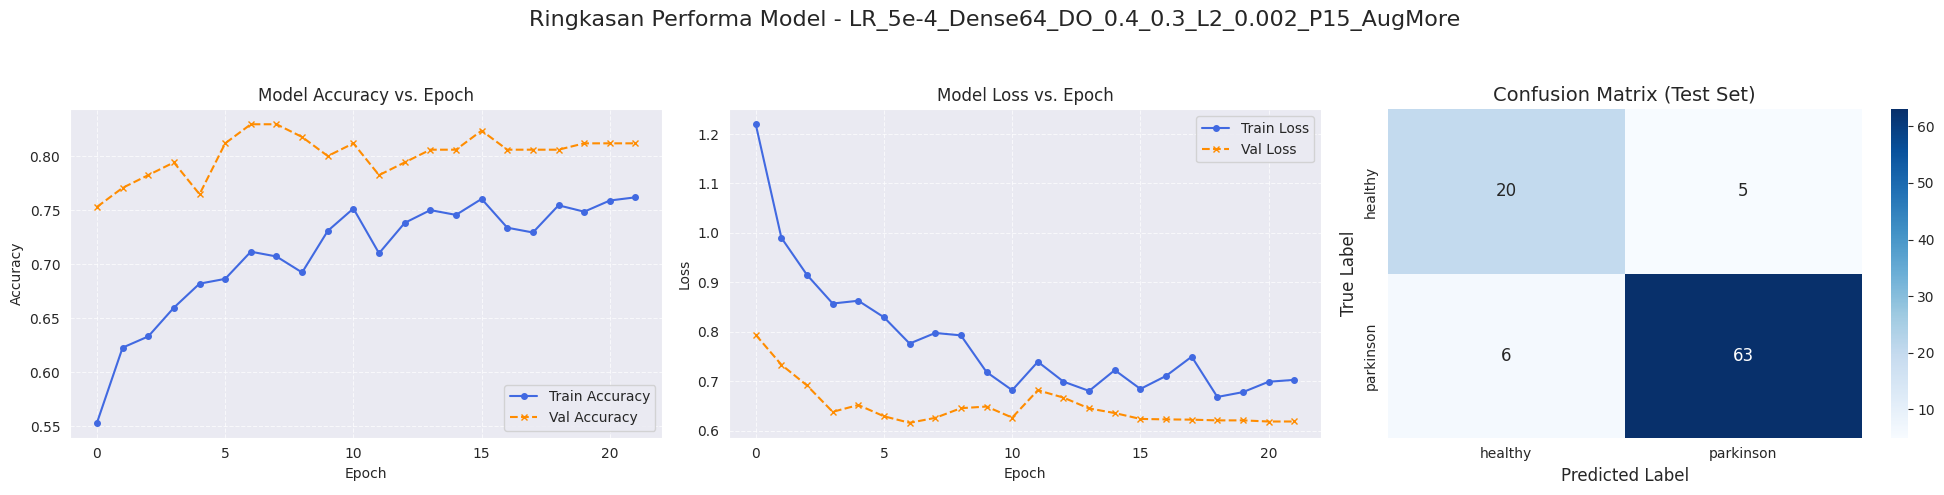

In [20]:
# Membuat Visualisasi Ringkasan
print(f"--- Membuat Visualisasi Ringkasan untuk {params['run_name']} ---")
history_data_run = history.history
cm_run = confusion_matrix(y_true_list, y_pred_final)

fig_summary, axes_summary = plt.subplots(1, 3, figsize=(20, 5))
fig_summary.suptitle(f'Ringkasan Performa Model - {params["run_name"]}', fontsize=16)

# Subplot 1: Akurasi
if 'accuracy' in history_data_run and 'val_accuracy' in history_data_run:
  axes_summary[0].plot(history_data_run['accuracy'], label='Train Accuracy', color='royalblue', marker='o', linestyle='-', markersize=4)
  axes_summary[0].plot(history_data_run['val_accuracy'], label='Val Accuracy', color='darkorange', marker='x', linestyle='--', markersize=5)
  axes_summary[0].set_title('Model Accuracy vs. Epoch'); axes_summary[0].set_xlabel('Epoch'); axes_summary[0].set_ylabel('Accuracy')
  axes_summary[0].legend(); axes_summary[0].grid(True, linestyle='--', alpha=0.7)
else:
  axes_summary[0].text(0.5, 0.5, 'Data Akurasi Tidak Tersedia', ha='center', va='center'); axes_summary[0].set_title('Model Accuracy'); axes_summary[0].axis('off')

# Subplot 2: Loss
if 'loss' in history_data_run and 'val_loss' in history_data_run:
  axes_summary[1].plot(history_data_run['loss'], label='Train Loss', color='royalblue', marker='o', linestyle='-', markersize=4)
  axes_summary[1].plot(history_data_run['val_loss'], label='Val Loss', color='darkorange', marker='x', linestyle='--', markersize=5)
  axes_summary[1].set_title('Model Loss vs. Epoch'); axes_summary[1].set_xlabel('Epoch'); axes_summary[1].set_ylabel('Loss')
  axes_summary[1].legend(); axes_summary[1].grid(True, linestyle='--', alpha=0.7)
else:
  axes_summary[1].text(0.5, 0.5, 'Data Loss Tidak Tersedia', ha='center', va='center'); axes_summary[1].set_title('Model Loss'); axes_summary[1].axis('off')

# Subplot 3: Confusion Matrix
# Pastikan class_names_from_tf sudah terdefinisi dengan benar (misal: ['healthy', 'parkinson'])
sns.heatmap(cm_run, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names_from_tf, yticklabels=class_names_from_tf,
            ax=axes_summary[2], cbar=True, annot_kws={"size": 12})
axes_summary[2].set_xlabel("Predicted Label", fontsize=12); axes_summary[2].set_ylabel("True Label", fontsize=12)
axes_summary[2].set_title("Confusion Matrix (Test Set)", fontsize=14)
axes_summary[2].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.93])
# plt.show() # Komentari jika tidak ingin langsung tampil di notebook untuk setiap run

#### Mencari Model Terbaik dari Semua Run di MLFLOW

In [21]:
EXPERIMENT_NAME_MLFLOW = "Parkinson_Detection_Capstone_Final_Runs" # Pastikan nama eksperimen sama
BEST_RUN_ID_FROM_MLFLOW_SEARCH = None # Variabel untuk ID dari MLflow search

try:
    experiment_mlflow = mlflow.get_experiment_by_name(EXPERIMENT_NAME_MLFLOW)
    if experiment_mlflow is None:
        print(f"Eksperimen '{EXPERIMENT_NAME_MLFLOW}' tidak ditemukan di MLflow.")
    else:
        experiment_id_mlflow = experiment_mlflow.experiment_id
        print(f"Mencari di Experiment ID MLflow: {experiment_id_mlflow}")

        METRIC_TO_SORT_BY_MLFLOW = 'metrics.test_accuracy_final' # Sesuai dengan yang Anda log
        # atau 'metrics.test_accuracy' jika itu yang Anda gunakan secara konsisten

        all_runs_df_mlflow = mlflow.search_runs(experiment_ids=[experiment_id_mlflow])

        if not all_runs_df_mlflow.empty:
            print(f"\nKolom yang tersedia dari MLflow untuk pencarian: {all_runs_df_mlflow.columns.tolist()}")

            if METRIC_TO_SORT_BY_MLFLOW in all_runs_df_mlflow.columns:
                all_runs_with_metric_mlflow = all_runs_df_mlflow.dropna(subset=[METRIC_TO_SORT_BY_MLFLOW])
                if not all_runs_with_metric_mlflow.empty:
                    all_runs_sorted_df_mlflow = all_runs_with_metric_mlflow.sort_values(by=METRIC_TO_SORT_BY_MLFLOW, ascending=False)
                    print("\n--- Ringkasan Beberapa Run Terbaik dari MLflow (Berdasarkan Akurasi Tes) ---")
                    display_cols_mlflow = [col for col in ['run_id', 'tags.mlflow.runName', METRIC_TO_SORT_BY_MLFLOW, 'params.initial_lr', 'params.dense_units'] if col in all_runs_sorted_df_mlflow.columns]
                    print(all_runs_sorted_df_mlflow[display_cols_mlflow].head())

                    best_run_overall_data_mlflow = all_runs_sorted_df_mlflow.iloc[0]
                    BEST_RUN_ID_FROM_MLFLOW_SEARCH = best_run_overall_data_mlflow['run_id']
                    best_run_name_overall_mlflow = best_run_overall_data_mlflow['tags.mlflow.runName']
                    best_test_accuracy_overall_mlflow = best_run_overall_data_mlflow[METRIC_TO_SORT_BY_MLFLOW]

                    print(f"\n--- Model TERBAIK dari SEMUA Eksperimen (Menurut MLflow) ---")
                    print(f"Run Name: {best_run_name_overall_mlflow}")
                    print(f"Run ID: {BEST_RUN_ID_FROM_MLFLOW_SEARCH}")
                    print(f"Test Accuracy: {best_test_accuracy_overall_mlflow:.4f}")
                else:
                    print(f"Tidak ada run dengan metrik '{METRIC_TO_SORT_BY_MLFLOW}' yang valid.")
            else:
                print(f"Peringatan: Metrik '{METRIC_TO_SORT_BY_MLFLOW}' tidak ada di MLflow. Tidak bisa memilih model terbaik berdasarkan metrik ini.")
        else:
            print(f"Tidak ada run di eksperimen '{EXPERIMENT_NAME_MLFLOW}'.")
except Exception as e_mlflow_search:
    print(f"Error saat mencari run di MLflow: {e_mlflow_search}")

print(f"\nRun ID yang akan digunakan untuk memuat model terbaik untuk Analisis Kesalahan: {BEST_RUN_ID_FROM_MLFLOW_SEARCH if BEST_RUN_ID_FROM_MLFLOW_SEARCH else best_run_id_overall_loop}")

Mencari di Experiment ID MLflow: 501962634581372297

Kolom yang tersedia dari MLflow untuk pencarian: ['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time', 'end_time', 'metrics.learning_rate_epoch', 'metrics.test_healthy_recall', 'metrics.val_loss_epoch', 'metrics.test_healthy_precision', 'metrics.val_accuracy_epoch', 'metrics.test_weighted_avg_recall', 'metrics.test_macro_avg_recall', 'metrics.recall_epoch', 'metrics.test_parkinson_f1_score', 'metrics.test_macro_avg_support', 'metrics.test_weighted_avg_support', 'metrics.test_weighted_avg_f1_score', 'metrics.val_precision_epoch', 'metrics.test_parkinson_recall', 'metrics.test_accuracy', 'metrics.test_macro_avg_precision', 'metrics.test_weighted_avg_precision', 'metrics.precision_epoch', 'metrics.test_loss_final', 'metrics.loss_epoch', 'metrics.test_recall_final', 'metrics.test_parkinson_support', 'metrics.val_recall_epoch', 'metrics.test_healthy_f1_score', 'metrics.accuracy_epoch', 'metrics.test_macro_avg_f1_score', 'met

#### TAHAP SEBELUM ANALISIS KESALAHAN: MEMUAT MODEL TERBAIK

In [22]:
# TAHAP SEBELUM ANALISIS KESALAHAN: MEMUAT MODEL TERBAIK DARI MLFLOW
model_for_final_analysis = None # Variabel yang akan digunakan di Tahap 5 & 6
is_pyfunc_model_for_final_analysis = False # Status pyfunc untuk model_for_final_analysis

# Tentukan run_id yang akan dimuat
run_id_to_load = None
if 'BEST_RUN_ID_FROM_MLFLOW_SEARCH' in locals() and BEST_RUN_ID_FROM_MLFLOW_SEARCH is not None:
    run_id_to_load = BEST_RUN_ID_FROM_MLFLOW_SEARCH
    print(f"Prioritas: Akan mencoba memuat model dari MLflow search (Run ID: {run_id_to_load}).")
elif 'best_run_id_overall_loop' in locals() and best_run_id_overall_loop is not None:
    run_id_to_load = best_run_id_overall_loop
    print(f"Fallback: Akan mencoba memuat model dari loop training terakhir (Run ID: {run_id_to_load}).")
else:
    print("Tidak ada Run ID yang valid (baik dari MLflow search maupun dari loop training terakhir).")

if run_id_to_load:
    try:
        logged_model_uri = f"runs:/{run_id_to_load}/model"
        print(f"\nMencoba memuat model sebagai 'pyfunc' dari MLflow run ID: {run_id_to_load} ({logged_model_uri})")
        model_for_final_analysis = mlflow.pyfunc.load_model(logged_model_uri) # Simpan ke variabel yang benar
        print("Model terbaik (sebagai pyfunc) berhasil dimuat.")
        # Heuristik untuk mengecek apakah ini pyfunc yang membungkus Keras atau pyfunc murni
        if not hasattr(model_for_final_analysis, 'layers') and hasattr(model_for_final_analysis, 'predict') and hasattr(model_for_final_analysis, 'metadata'):
            is_pyfunc_model_for_final_analysis = True; print("Model dikonfirmasi sebagai objek pyfunc murni/non-Keras.")
        else:
            # Bisa jadi ini adalah objek Keras yang dikembalikan oleh pyfunc.load_model jika tidak ada wrapper khusus
            # atau jika mlflow.keras.load_model lebih cocok. Kita akan cek di tahap prediksi.
            is_pyfunc_model_for_final_analysis = True # Asumsikan pyfunc, akan dicek lebih lanjut saat prediksi
            print("Model dimuat via pyfunc. Perilaku prediksi akan dicek.")
    except Exception as e_pyfunc:
        print(f"Gagal memuat model sebagai 'pyfunc': {e_pyfunc}. Mencoba sebagai Keras...")
        try:
            model_for_final_analysis = mlflow.keras.load_model(logged_model_uri) # Simpan ke variabel yang benar
            is_pyfunc_model_for_final_analysis = False; print("Model terbaik (sebagai Keras) berhasil dimuat.")
        except Exception as e_keras:
            print(f"Gagal memuat model sebagai Keras juga: {e_keras}")
            # Fallback ke model_best_in_loop JIKA run_id_to_load ADALAH ID dari loop terakhir
            if run_id_to_load == best_run_id_overall_loop and 'model_best_in_loop' in locals() and model_best_in_loop is not None:
                model_for_final_analysis = model_best_in_loop # Simpan ke variabel yang benar
                is_pyfunc_model_for_final_analysis = False # Ini pasti model Keras
                print("Menggunakan model terbaik dari loop training saat ini sebagai fallback (objek Keras).")
            else:
                print(f"Tidak dapat fallback ke model_best_in_loop karena Run ID yang dicari ({run_id_to_load}) mungkin berbeda atau model_best_in_loop tidak ada.")
                # Biarkan model_for_final_analysis = None
else:
    print("Tidak ada Run ID valid untuk memuat model.")
    # Coba fallback ke model terbaik dari loop terakhir jika ada
    if 'model_best_in_loop' in locals() and model_best_in_loop is not None:
        model_for_final_analysis = model_best_in_loop # Simpan ke variabel yang benar
        is_pyfunc_model_for_final_analysis = False # Ini pasti model Keras
        print("Menggunakan model terbaik dari loop training saat ini sebagai fallback (jika ada).")
    else:
        print("Tidak ada model yang tersedia untuk analisis (tidak ada Run ID valid dan tidak ada model dari loop).")

if model_for_final_analysis is None:
    print("PERINGATAN: Tidak ada model yang berhasil dimuat atau dipilih untuk analisis kesalahan. Tahap analisis akan dilewati.")
    # Anda bisa menambahkan raise ValueError di sini jika ingin menghentikan eksekusi

print(f"Status model yang akan digunakan untuk analisis akhir: is_pyfunc_model = {is_pyfunc_model_for_final_analysis}")
if model_for_final_analysis is not None:
    print(f"Objek model untuk analisis: {type(model_for_final_analysis)}")

Prioritas: Akan mencoba memuat model dari MLflow search (Run ID: 00d0a21d9fde4912b59a8192f6a1ea53).

Mencoba memuat model sebagai 'pyfunc' dari MLflow run ID: 00d0a21d9fde4912b59a8192f6a1ea53 (runs:/00d0a21d9fde4912b59a8192f6a1ea53/model)


Model terbaik (sebagai pyfunc) berhasil dimuat.
Model dikonfirmasi sebagai objek pyfunc murni/non-Keras.
Status model yang akan digunakan untuk analisis akhir: is_pyfunc_model = True
Objek model untuk analisis: <class 'mlflow.pyfunc.PyFuncModel'>


## Tahap 5: ANALISIS KESALAHAN (Menggunakan model_for_analysis)

Melakukan analisis kesalahan dengan model dari Run ID/Sumber: 00d0a21d9fde4912b59a8192f6a1ea53
Model akan diperlakukan sebagai pyfunc: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

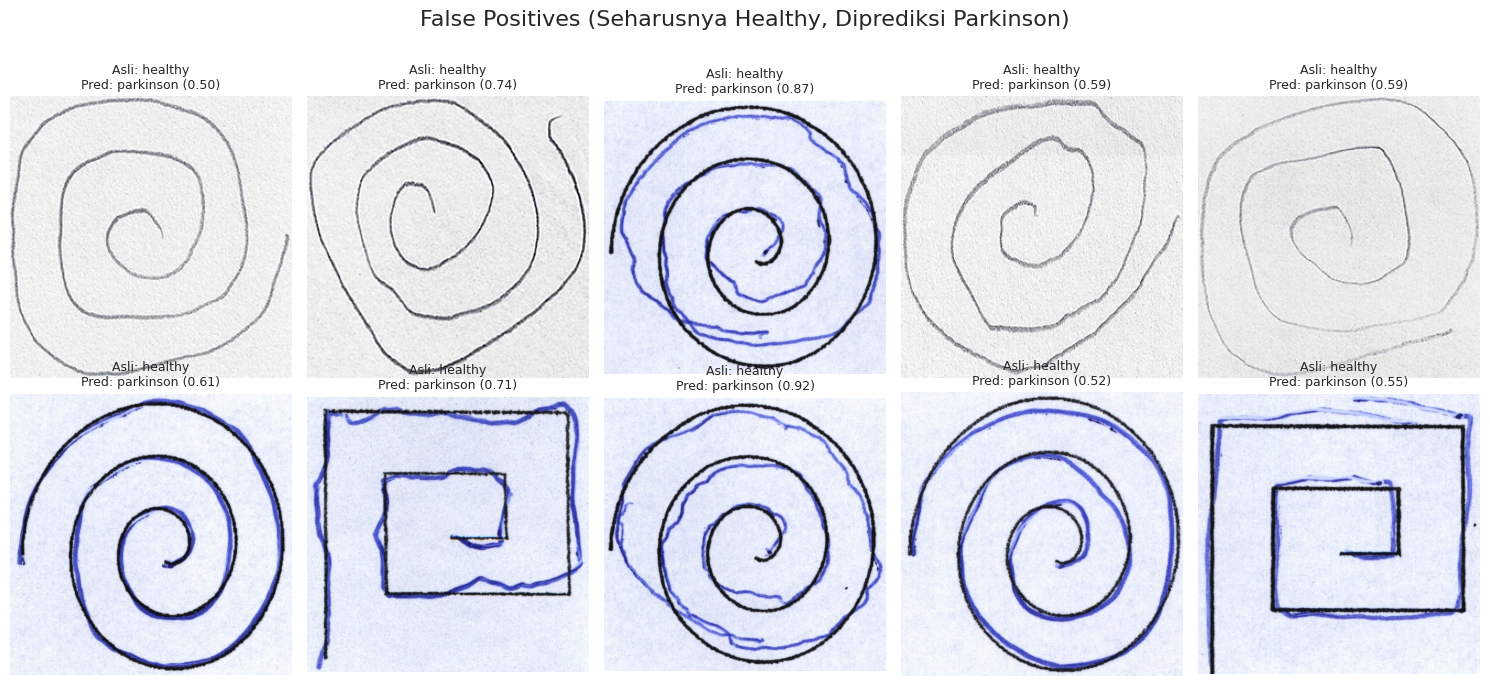


Menampilkan 5 dari 5 gambar false negatives (seharusnya parkinson, diprediksi healthy):


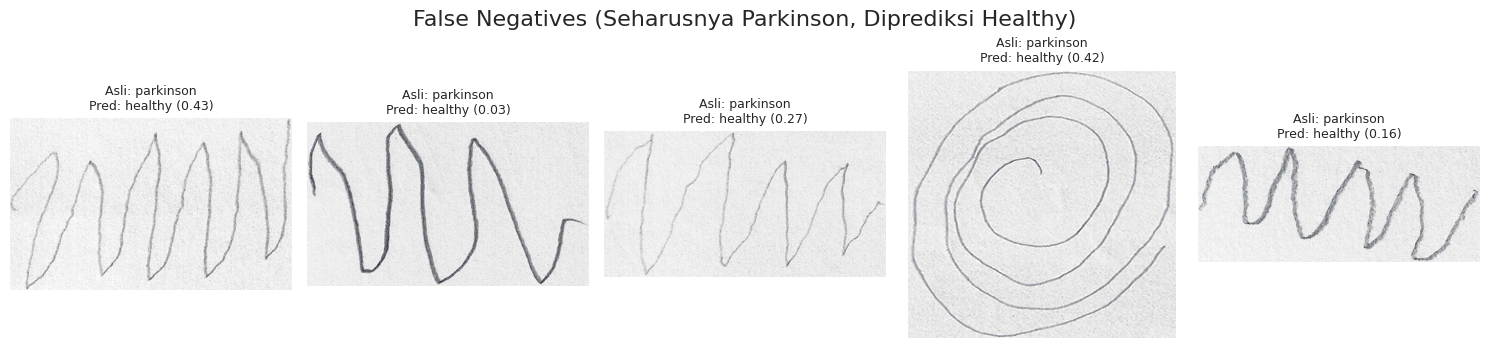


--- Analisis Manual Kesalahan ---
Amati gambar-gambar di atas dan catat observasi Anda mengenai pola kesalahan.


In [23]:
if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None and \
   'test_df' in locals() and not test_df.empty and \
   'class_names_from_tf' in locals() and \
   'IMG_SIZE' in locals() and \
   'is_pyfunc_model_for_final_analysis' in locals(): # Tambahkan pengecekan ini

    # Tentukan sumber model untuk informasi
    if 'run_id_to_load' in locals() and run_id_to_load:
        run_id_info_display = run_id_to_load
    elif 'best_run_id_overall_loop' in locals() and best_run_id_overall_loop:
        run_id_info_display = best_run_id_overall_loop + " (dari loop terakhir)"
    else:
        run_id_info_display = "Model terakhir dari sesi training (tidak ada ID run spesifik)"

    print(f"Melakukan analisis kesalahan dengan model dari Run ID/Sumber: {run_id_info_display}")
    print(f"Model akan diperlakukan sebagai pyfunc: {is_pyfunc_model_for_final_analysis}")


    all_image_paths_analysis = []
    all_true_labels_int_analysis = []
    all_predicted_labels_int_analysis = []
    all_predicted_probs_analysis = []

    for index, row in test_df.iterrows():
        img_path = row['path']
        actual_label_str = row['labels_main']
        try:
            img = image.load_img(img_path, target_size=IMG_SIZE)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_array = image.img_to_array(img)
            img_array_expanded = np.expand_dims(img_array, axis=0)
            # Preprocessing spesifik MobileNetV2 tetap dilakukan sebelum ke model
            img_processed_for_pred = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))

            pred_prob = 0.0 # Inisialisasi
            if is_pyfunc_model_for_final_analysis: # Atau is_pyfunc_model_final tergantung nama variabel Anda
                # Untuk model Keras yang dibungkus pyfunc oleh MLflow,
                # input yang paling mungkin berhasil adalah array NumPy.
                # Konversi EagerTensor ke NumPy array.
                input_data_for_pyfunc = img_processed_for_pred.numpy()

                try:
                    pred_output = model_for_final_analysis.predict(input_data_for_pyfunc)
                    # print(f"Debug: Output pyfunc mentah (setelah input numpy): {pred_output}") # Untuk debug jika perlu

                    # Interpretasi output pyfunc (asumsi sama seperti sebelumnya)
                    if isinstance(pred_output, dict):
                        pred_prob_val = pred_output[list(pred_output.keys())[0]]
                        if isinstance(pred_prob_val, (list, np.ndarray)): pred_prob_val = pred_prob_val[0]
                        pred_prob = float(pred_prob_val)
                    elif isinstance(pred_output, (list, np.ndarray)):
                        pred_prob_val = pred_output[0]
                        if isinstance(pred_prob_val, (list, np.ndarray)): pred_prob_val = pred_prob_val[0]
                        pred_prob = float(pred_prob_val)
                    else:
                        pred_prob = float(pred_output)

                except Exception as e_py_pred:
                    print(f"Error saat prediksi dengan pyfunc (input numpy): {e_py_pred}")
                    # Jika error ini masih terjadi, mungkin ada masalah lebih dalam dengan bagaimana model di-log
                    # atau signature input yang diharapkan oleh wrapper pyfunc.
                    # Anda bisa mencoba memeriksa model_for_final_analysis.metadata.get_input_schema()
                    # untuk melihat apakah ada petunjuk tentang format input yang diharapkan.
                    continue # Lewati gambar ini jika prediksi gagal

            else: # Model Keras biasa (objek tf.keras.Model)
                pred_prob = model_for_final_analysis.predict(img_processed_for_pred, verbose=0)[0][0]
                pred_prob = float(pred_prob)


            predicted_label_int = 1 if pred_prob > 0.5 else 0

            all_image_paths_analysis.append(img_path)
            all_true_labels_int_analysis.append(class_names_from_tf.index(actual_label_str))
            all_predicted_labels_int_analysis.append(predicted_label_int)
            all_predicted_probs_analysis.append(pred_prob)
        except Exception as e:
            print(f"Error memproses {img_path} untuk analisis kesalahan: {e}")
            # Anda bisa memutuskan untuk menambahkan placeholder atau mengabaikan gambar ini
            # agar panjang list tetap konsisten atau menandai sebagai error.

    if not all_image_paths_analysis:
        print("Tidak ada gambar yang berhasil diproses untuk analisis kesalahan.")
    else:
        y_true_analysis_arr = np.array(all_true_labels_int_analysis)
        y_pred_analysis_arr = np.array(all_predicted_labels_int_analysis)
        misclassified_mask = (y_true_analysis_arr != y_pred_analysis_arr)

        if np.any(misclassified_mask):
            misclassified_paths = np.array(all_image_paths_analysis)[misclassified_mask]
            misclassified_true_labels_int = y_true_analysis_arr[misclassified_mask]
            misclassified_pred_probs = np.array(all_predicted_probs_analysis)[misclassified_mask]

            false_positives_paths, false_negatives_paths = [], []
            fp_true_labels_str, fp_pred_probs = [], []
            fn_true_labels_str, fn_pred_probs = [], []

            healthy_idx = class_names_from_tf.index('healthy')
            parkinson_idx = class_names_from_tf.index('parkinson')

            for i in range(len(misclassified_paths)):
                true_label_int = misclassified_true_labels_int[i]
                img_path_err = misclassified_paths[i]
                pred_prob_err = misclassified_pred_probs[i]
                if true_label_int == healthy_idx and pred_prob_err > 0.5:
                    false_positives_paths.append(img_path_err)
                    fp_true_labels_str.append(class_names_from_tf[true_label_int])
                    fp_pred_probs.append(pred_prob_err)
                elif true_label_int == parkinson_idx and pred_prob_err <= 0.5:
                    false_negatives_paths.append(img_path_err)
                    fn_true_labels_str.append(class_names_from_tf[true_label_int])
                    fn_pred_probs.append(pred_prob_err)

            print(f"\nJumlah False Positives (Healthy -> Parkinson): {len(false_positives_paths)}")
            print(f"Jumlah False Negatives (Parkinson -> Healthy): {len(false_negatives_paths)}")

            def display_misclassified_images(image_paths_list_err, actual_labels_str_list_err, predicted_probs_list_err, title_prefix_err, class_names_map_list_err):
                num_images_err = len(image_paths_list_err)
                if num_images_err == 0: print(f"Tidak ada gambar {title_prefix_err.lower()} untuk ditampilkan."); return
                max_display_err = 15
                num_to_display_err = min(num_images_err, max_display_err)
                print(f"\nMenampilkan {num_to_display_err} dari {num_images_err} gambar {title_prefix_err.lower()}:")
                cols_err = 5
                rows_err = (num_to_display_err + cols_err - 1) // cols_err if cols_err > 0 else 0
                if rows_err == 0 and num_to_display_err > 0 : rows_err = 1
                if rows_err == 0: print(f"Tidak ada gambar valid untuk subplot {title_prefix_err.lower()}"); return
                fig_err, axes_err = plt.subplots(rows_err, cols_err, figsize=(cols_err * 3, rows_err * 3.5))
                if num_to_display_err == 1 and rows_err == 1 and cols_err == 1 : axes_err = np.array([axes_err])
                axes_err = axes_err.flatten()
                for i_err in range(num_to_display_err):
                    try:
                        img_err = Image.open(image_paths_list_err[i_err]).convert('RGB')
                        axes_err[i_err].imshow(img_err)
                        pred_label_idx_err = 1 if predicted_probs_list_err[i_err] > 0.5 else 0
                        pred_label_text_err = class_names_map_list_err[pred_label_idx_err]
                        axes_err[i_err].set_title(f"Asli: {actual_labels_str_list_err[i_err]}\nPred: {pred_label_text_err} ({predicted_probs_list_err[i_err]:.2f})", fontsize=9)
                        axes_err[i_err].axis('off')
                    except Exception as e_disp: # Ganti nama variabel error
                        axes_err[i_err].set_title(f"Error: {os.path.basename(image_paths_list_err[i_err])}", fontsize=8)
                        axes_err[i_err].axis('off'); print(f"Gagal menampilkan {image_paths_list_err[i_err]}: {e_disp}")
                for j_err in range(num_to_display_err, len(axes_err)): axes_err[j_err].axis('off')
                fig_err.suptitle(title_prefix_err, fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

            display_misclassified_images(false_positives_paths, fp_true_labels_str, fp_pred_probs,"False Positives (Seharusnya Healthy, Diprediksi Parkinson)", class_names_from_tf)
            display_misclassified_images(false_negatives_paths, fn_true_labels_str, fn_pred_probs,"False Negatives (Seharusnya Parkinson, Diprediksi Healthy)", class_names_from_tf)
            print("\n--- Analisis Manual Kesalahan ---")
            print("Amati gambar-gambar di atas dan catat observasi Anda mengenai pola kesalahan.")
        else:
            print("Tidak ada kesalahan klasifikasi pada test set dengan model ini. Selamat!")
else:
    print("Prasyarat untuk analisis kesalahan tidak terpenuhi.")
    if 'model_for_final_analysis' not in locals() or model_for_final_analysis is None: print(" - Variabel 'model_for_final_analysis' belum terdefinisi atau None.")
    if 'test_df' not in locals() or test_df.empty: print(" - DataFrame 'test_df' kosong atau belum terdefinisi.")
    if 'class_names_from_tf' not in locals(): print(" - Variabel 'class_names_from_tf' belum terdefinisi.")
    if 'IMG_SIZE' not in locals(): print(" - Variabel 'IMG_SIZE' belum terdefinisi.")
    if 'is_pyfunc_model_for_final_analysis' not in locals(): print(" - Variabel 'is_pyfunc_model_for_final_analysis' belum terdefinisi.")

## Tahap 6: Fungsi Prediksi Gambar Tunggal (menggunakan model_for_analysis)

In [24]:
def predict_single_image(img_path, model_to_predict, class_names_map, is_pyfunc, target_size=(224, 224)):
    if model_to_predict is None:
        print("Model belum dilatih atau tidak tersedia untuk prediksi.")
        return None, None
    try:
        img = image.load_img(img_path, target_size=target_size)
        if img.mode != 'RGB': img = img.convert('RGB')
        img_array = image.img_to_array(img)
        img_array_expanded = np.expand_dims(img_array, axis=0)
        # Preprocessing spesifik MobileNetV2 tetap diperlukan sebelum ke model APAPUN (Keras atau Pyfunc Keras)
        img_processed_for_prediction = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))

        # Penyesuaian prediksi berdasarkan jenis model
        if is_pyfunc:
            try:
                pred_output = model_to_predict.predict(img_processed_for_prediction)
            except Exception as e_pyfunc_pred_np_single:
                print(f"Gagal prediksi pyfunc dengan numpy array (single): {e_pyfunc_pred_np_single}. Mencoba dengan DataFrame (flattened)...")
                df_input = pd.DataFrame(img_processed_for_prediction.numpy().reshape(1, -1))
                pred_output = model_to_predict.predict(df_input)

            if isinstance(pred_output, dict):
                pred_prob_single = pred_output[list(pred_output.keys())[0]]
                if isinstance(pred_prob_single, (list, np.ndarray)): pred_prob_single = pred_prob_single[0]
            elif isinstance(pred_output, (list, np.ndarray)):
                pred_prob_single = pred_output[0]
                if isinstance(pred_prob_single, (list, np.ndarray)): pred_prob_single = pred_prob_single[0]
            else:
                pred_prob_single = pred_output
        else: # Model Keras biasa
            pred_prob_single = model_to_predict.predict(img_processed_for_prediction, verbose=0)[0][0]

        predicted_class_index = 1 if float(pred_prob_single) > 0.5 else 0
        label_pred_text = class_names_map[predicted_class_index] if predicted_class_index < len(class_names_map) else "Unknown"

        plt.figure(figsize=(4,4))
        plt.imshow(img); plt.axis('off'); plt.title(f"Prediksi: {label_pred_text} (Skor: {float(pred_prob_single):.2f})")
        plt.show()
        return label_pred_text, float(pred_prob_single)
    except FileNotFoundError: print(f"Error: File gambar tidak ditemukan di {img_path}"); return None, None
    except Exception as e: print(f"Error saat memprediksi gambar {img_path}: {e}"); return None, None

In [25]:
# Contoh Penggunaan (setelah loop training selesai)
if 'model_for_analysis' in locals() and model_for_analysis is not None and \
   'test_df' in locals() and not test_df.empty and \
   'class_names_from_tf' in locals():
    try:
        sample_parkinson_path = test_df[test_df['labels_main'] == 'parkinson']['path'].sample(1, random_state=SEED).iloc[0]
        print("\n--- Contoh Prediksi pada Gambar Parkinson dari Test Set (Model Terbaik) ---")
        if os.path.exists(sample_parkinson_path):
            predict_single_image(sample_parkinson_path, model_for_analysis, class_names_from_tf, is_pyfunc_model)
        else:
            print(f"File tidak ditemukan: {sample_parkinson_path}")
    except (ValueError, IndexError): print("Tidak ada sampel gambar Parkinson di test_df.")
    try:
        sample_healthy_path = test_df[test_df['labels_main'] == 'healthy']['path'].sample(1, random_state=SEED).iloc[0]
        print("\n--- Contoh Prediksi pada Gambar Healthy dari Test Set (Model Terbaik) ---")
        if os.path.exists(sample_healthy_path):
            predict_single_image(sample_healthy_path, model_for_analysis, class_names_from_tf, is_pyfunc_model)
        else:
            print(f"File tidak ditemukan: {sample_healthy_path}")
    except (ValueError, IndexError): print("Tidak ada sampel gambar Healthy di test_df.")
else:
    print("Model terbaik tidak tersedia atau DataFrame test_df kosong, tidak bisa melakukan contoh prediksi.")

Model terbaik tidak tersedia atau DataFrame test_df kosong, tidak bisa melakukan contoh prediksi.


## Tahap 7. Evaluasi dan Validasi

### 7.1 Menghitung Metrik Aditional


--- Memulai Evaluasi Model Final (dengan Metrik Tambahan) ---
Menggunakan model: <class 'mlflow.pyfunc.PyFuncModel'>
Melakukan prediksi pada Test Set...


Predicting on Test Set:   0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Hasil Evaluasi pada Test Set (Menggunakan Model Final) ---
Test Accuracy: 0.8830
Test Precision: 0.9265
Test Recall (Sensitivity): 0.9130
Test F1-Score: 0.9197
Test Log Loss: 0.3966
Test Specificity: 0.8000
Test AUC-ROC: 0.8829

--- Classification Report (Test Set, Menggunakan Model Final) ---
              precision    recall  f1-score   support

     healthy       0.77      0.80      0.78        25
   parkinson       0.93      0.91      0.92        69

    accuracy                           0.88        94
   macro avg       0.85      0.86      0.85        94
weighted avg       0.88      0.88      0.88        94


--- Confusion Matrix (Test Set, Menggunakan Model Final) ---


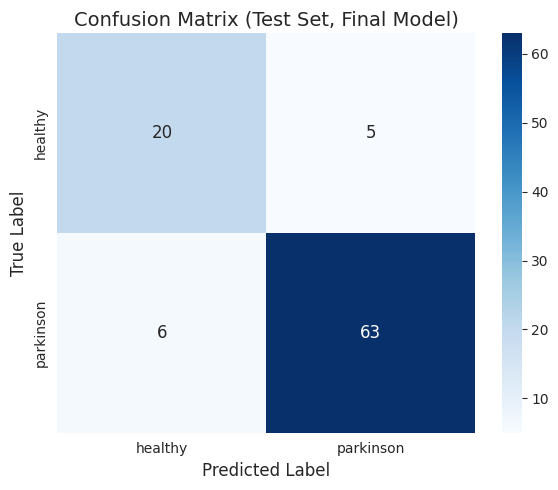


--- Selesai Evaluasi Model Final (dengan Metrik Tambahan) ---


In [27]:
# --- Tahap 5: Evaluasi Model Final Menggunakan model_for_final_analysis (dengan Metrik Tambahan) ---
print("\n--- Memulai Evaluasi Model Final (dengan Metrik Tambahan) ---")

if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None and \
   'test_ds_final' in locals() and test_ds_final is not None and \
   'class_names_from_tf' in locals() and class_names_from_tf is not None and \
   'is_pyfunc_model_for_final_analysis' in locals():

    print(f"Menggunakan model: {type(model_for_final_analysis)}")

    # 1. Prediksi pada Test Set menggunakan model_for_final_analysis
    print("Melakukan prediksi pada Test Set...")
    y_true_list_final, y_pred_probs_list_final = [], []

    for img_batch, label_batch in tq(test_ds_final, desc="Predicting on Test Set"):
        try:
            # --- PERBAIKAN DI SINI: Konversi Tensor ke NumPy Array ---
            img_batch_np = img_batch.numpy()
            label_batch_np = label_batch.numpy()
            # --------------------------------------------------------

            if is_pyfunc_model_for_final_analysis:
                 # Gunakan NumPy array sebagai input untuk model pyfunc
                 preds_final = model_for_final_analysis.predict(img_batch_np)
            else:
                 # Untuk model Keras (seharusnya juga menerima NumPy array, atau EagerTensor jika tidak dimuat via pyfunc)
                 # Menggunakan NumPy array di sini juga untuk konsistensi
                 preds_final = model_for_final_analysis.predict(img_batch_np)


            y_true_list_final.extend(label_batch_np) # Gunakan label_batch_np
            # Untuk model biner dengan sigmoid, outputnya (batch_size, 1), perlu flatten
            y_pred_probs_list_final.extend(preds_final.flatten())
        except Exception as e_predict:
            print(f"Error saat prediksi batch: {e_predict}")
            break

    if not y_true_list_final:
        print("Prediksi tidak berhasil dilakukan. Periksa model dan data input.")
    else:
        y_true_final_np = np.array(y_true_list_final)
        y_pred_probs_final_np = np.array(y_pred_probs_list_final)
        # Konversi probabilitas ke label biner untuk Confusion Matrix dan Classification Report
        y_pred_final_labels = (y_pred_probs_final_np > 0.5).astype("int32")

        # 2. Hitung Metrik Evaluasi Utama (sudah ada sebelumnya)
        print("\n--- Hasil Evaluasi pada Test Set (Menggunakan Model Final) ---")

        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix

        accuracy_final = accuracy_score(y_true_final_np, y_pred_final_labels)
        precision_final = precision_score(y_true_final_np, y_pred_final_labels)
        recall_final = recall_score(y_true_final_np, y_pred_final_labels)

        print(f"Test Accuracy: {accuracy_final:.4f}")
        print(f"Test Precision: {precision_final:.4f}")
        print(f"Test Recall (Sensitivity): {recall_final:.4f}") # Recall juga dikenal sebagai Sensitivity

        # 3. Hitung Metrik Tambahan
        f1_final = f1_score(y_true_final_np, y_pred_final_labels)
        loss_final = log_loss(y_true_final_np, y_pred_probs_final_np)

        # Spesifisitas memerlukan Confusion Matrix
        cm_final = confusion_matrix(y_true_final_np, y_pred_final_labels)
        # Pastikan urutan kelas di CM sesuai dengan label biner (0=healthy, 1=parkinson)
        # Jika kelas_names_from_tf = ['healthy', 'parkinson'], maka:
        # cm[0,0] = TN (Healthy diprediksi Healthy)
        # cm[0,1] = FP (Healthy diprediksi Parkinson)
        # cm[1,0] = FN (Parkinson diprediksi Healthy)
        # cm[1,1] = TP (Parkinson diprediksi Parkinson)
        TN = cm_final[0, 0]
        FP = cm_final[0, 1]
        specificity_final = TN / (TN + FP) if (TN + FP) > 0 else 0.0 # Hindari pembagian dengan nol

        # AUC-ROC memerlukan probabilitas
        # Cek jika ada setidaknya dua kelas di y_true_final_np
        if len(np.unique(y_true_final_np)) == 2:
             auc_roc_final = roc_auc_score(y_true_final_np, y_pred_probs_final_np)
        else:
             auc_roc_final = np.nan # Tidak bisa dihitung jika hanya ada satu kelas

        print(f"Test F1-Score: {f1_final:.4f}")
        print(f"Test Log Loss: {loss_final:.4f}")
        print(f"Test Specificity: {specificity_final:.4f}")
        if not np.isnan(auc_roc_final):
             print(f"Test AUC-ROC: {auc_roc_final:.4f}")
        else:
             print("Test AUC-ROC: Tidak dapat dihitung (dataset uji hanya memiliki satu kelas)")


        # 4. Classification Report (Menggunakan label biner)
        print("\n--- Classification Report (Test Set, Menggunakan Model Final) ---")
        report_final_str = classification_report(y_true_final_np, y_pred_final_labels, target_names=class_names_from_tf)
        print(report_final_str)

        # 5. Confusion Matrix (Menggunakan label biner)
        print("\n--- Confusion Matrix (Test Set, Menggunakan Model Final) ---")
        # cm_final sudah dihitung di atas untuk Specificity

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names_from_tf, yticklabels=class_names_from_tf,
                    cbar=True, annot_kws={"size": 12})
        plt.xlabel("Predicted Label", fontsize=12)
        plt.ylabel("True Label", fontsize=12)
        plt.title("Confusion Matrix (Test Set, Final Model)", fontsize=14)
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.tight_layout()
        plt.show()

else:
    print("Variabel model_for_final_analysis atau data uji (test_ds_final) belum siap. Lewati evaluasi final.")

print("\n--- Selesai Evaluasi Model Final (dengan Metrik Tambahan) ---")

### 7.2 Menghasilkan Confusion Matrix


--- Menghasilkan dan Menampilkan Confusion Matrix ---

Confusion Matrix (Raw):
 [[20  5]
 [ 6 63]]


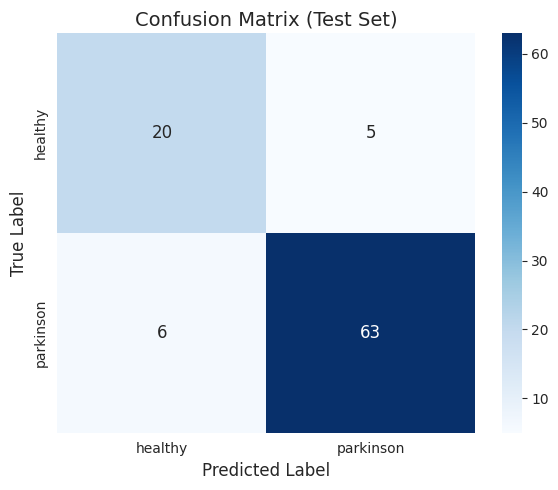


--- Selesai Menghasilkan dan Menampilkan Confusion Matrix ---


In [28]:
# --- Code untuk Menghasilkan dan Menampilkan Confusion Matrix ---
print("\n--- Menghasilkan dan Menampilkan Confusion Matrix ---")

# Pastikan variabel-variabel yang diperlukan sudah tersedia:
# - y_true_final_np: NumPy array dari label sebenarnya (misal: [0, 1, 0, 1, ...])
# - y_pred_final_labels: NumPy array dari label prediksi biner (misal: [0, 1, 0, 0, ...])
# - class_names_from_tf: List nama kelas (misal: ['healthy', 'parkinson'])

if 'y_true_final_np' in locals() and 'y_pred_final_labels' in locals() and 'class_names_from_tf' in locals():

    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Hitung Confusion Matrix
    # sklearn.metrics.confusion_matrix mengharapkan y_true pertama, y_pred kedua
    cm = confusion_matrix(y_true_final_np, y_pred_final_labels)

    print("\nConfusion Matrix (Raw):\n", cm)

    # Tampilkan Confusion Matrix menggunakan Seaborn Heatmap
    plt.figure(figsize=(6, 5)) # Sesuaikan ukuran plot jika perlu
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names_from_tf, # Label untuk sumbu x (Prediksi)
                yticklabels=class_names_from_tf, # Label untuk sumbu y (Sebenarnya)
                cbar=True, # Tampilkan color bar
                annot_kws={"size": 12}) # Ukuran font untuk anotasi (angka di dalam sel)

    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title("Confusion Matrix (Test Set)", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=10) # Sesuaikan ukuran tick label
    plt.tight_layout() # Sesuaikan layout agar tidak terpotong
    plt.show()

else:
    print("Variabel y_true_final_np, y_pred_final_labels, atau class_names_from_tf belum tersedia.")
    print("Pastikan Anda sudah menjalankan kode prediksi sebelumnya.")

print("\n--- Selesai Menghasilkan dan Menampilkan Confusion Matrix ---")

### 7.3 Memvisualisasikan hasil evaluasi


--- Memulai Visualisasi Hasil Evaluasi ---
Menghasilkan Confusion Matrix...


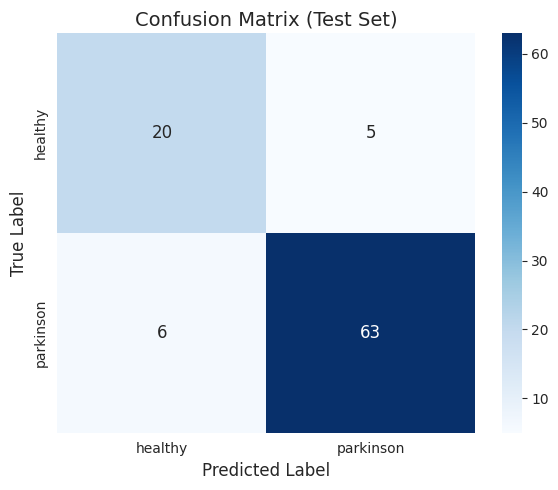

Menghasilkan ROC Curve...


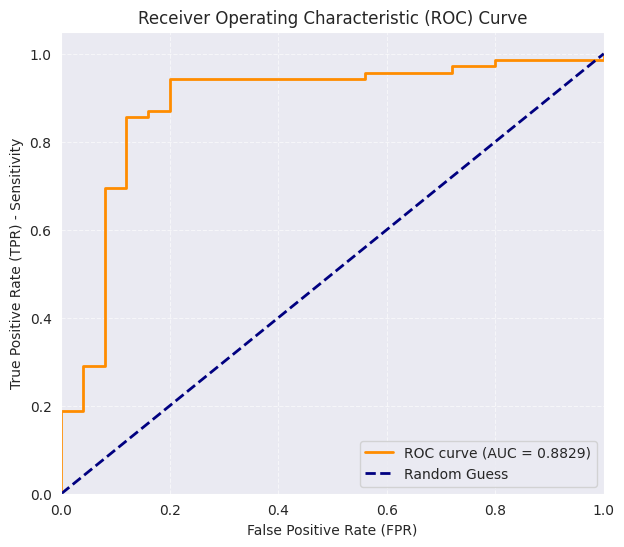

Menghasilkan Precision-Recall Curve...


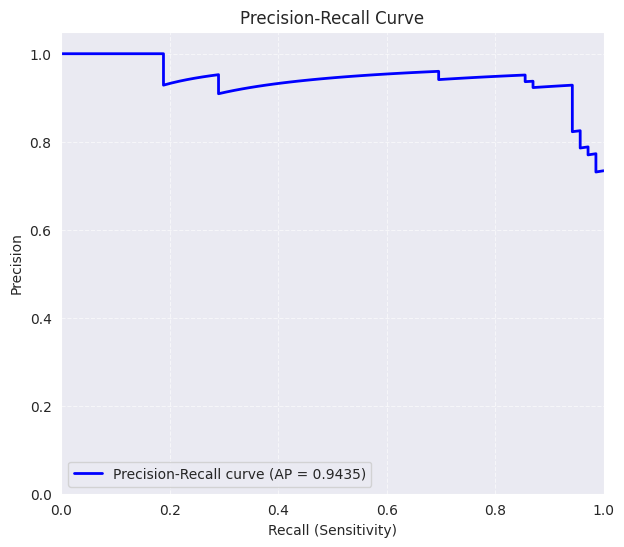

Menghasilkan Histogram Probabilitas Prediksi...


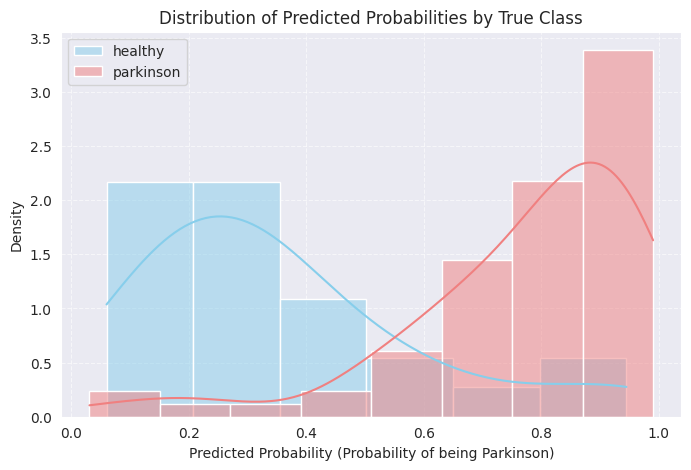


--- Selesai Visualisasi Hasil Evaluasi ---


In [29]:
# --- Code untuk Visualisasi Hasil Evaluasi ---
print("\n--- Memulai Visualisasi Hasil Evaluasi ---")

# Pastikan variabel-variabel yang diperlukan sudah tersedia:
# - y_true_final_np: NumPy array dari label sebenarnya
# - y_pred_final_labels: NumPy array dari label prediksi biner
# - y_pred_probs_final_np: NumPy array dari probabilitas prediksi
# - class_names_from_tf: List nama kelas

if 'y_true_final_np' in locals() and 'y_pred_final_labels' in locals() and \
   'y_pred_probs_final_np' in locals() and 'class_names_from_tf' in locals():

    from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # --- 1. Confusion Matrix ---
    print("Menghasilkan Confusion Matrix...")
    cm = confusion_matrix(y_true_final_np, y_pred_final_labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names_from_tf,
                yticklabels=class_names_from_tf,
                cbar=True, annot_kws={"size": 12})

    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title("Confusion Matrix (Test Set)", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()

    # --- 2. ROC Curve dan AUC ---
    print("Menghasilkan ROC Curve...")
    # roc_curve memerlukan label sebenarnya dan probabilitas prediksi dari kelas positif (kelas 1)
    # Pastikan y_true_final_np hanya berisi 0 dan 1, dan y_pred_probs_final_np adalah probabilitas kelas 1
    if len(np.unique(y_true_final_np)) == 2:
        fpr, tpr, thresholds_roc = roc_curve(y_true_final_np, y_pred_probs_final_np)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR) - Sensitivity')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("ROC Curve tidak dapat digenerate: Data uji hanya memiliki satu kelas.")


    # --- 3. Precision-Recall Curve ---
    print("Menghasilkan Precision-Recall Curve...")
    # precision_recall_curve memerlukan label sebenarnya dan probabilitas prediksi dari kelas positif (kelas 1)
    if len(np.unique(y_true_final_np)) == 2:
        precision, recall, thresholds_pr = precision_recall_curve(y_true_final_np, y_pred_probs_final_np)
        # average_precision_score menghitung area di bawah PR curve
        avg_precision = average_precision_score(y_true_final_np, y_pred_probs_final_np)

        plt.figure(figsize=(7, 6))
        plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
        plt.xlabel('Recall (Sensitivity)')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.legend(loc="lower left")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("Precision-Recall Curve tidak dapat digenerate: Data uji hanya memiliki satu kelas.")

    # --- 4. Histogram Probabilitas Prediksi ---
    print("Menghasilkan Histogram Probabilitas Prediksi...")
    # Pisahkan probabilitas berdasarkan label sebenarnya
    probs_healthy = y_pred_probs_final_np[y_true_final_np == 0]
    probs_parkinson = y_pred_probs_final_np[y_true_final_np == 1]

    plt.figure(figsize=(8, 5))
    sns.histplot(probs_healthy, color="skyblue", label=class_names_from_tf[0], kde=True, stat="density", common_norm=False)
    sns.histplot(probs_parkinson, color="lightcoral", label=class_names_from_tf[1], kde=True, stat="density", common_norm=False)

    plt.title('Distribution of Predicted Probabilities by True Class')
    plt.xlabel('Predicted Probability (Probability of being Parkinson)') # Sesuaikan label ini
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


else:
    print("Variabel y_true_final_np, y_pred_final_labels, y_pred_probs_final_np, atau class_names_from_tf belum tersedia.")
    print("Pastikan Anda sudah menjalankan kode prediksi sebelumnya.")

print("\n--- Selesai Visualisasi Hasil Evaluasi ---")

### 7.4 Melakukan Analisis Kesalahan


--- Memulai Analisis Kesalahan ---

Total sampel di Test Set: 94
Jumlah sampel yang salah diklasifikasikan: 11
Jumlah False Positives (True: healthy, Predicted: parkinson): 5
Jumlah False Negatives (True: parkinson, Predicted: healthy): 6

--- Contoh 5 False Positives (healthy yang diprediksi parkinson) ---


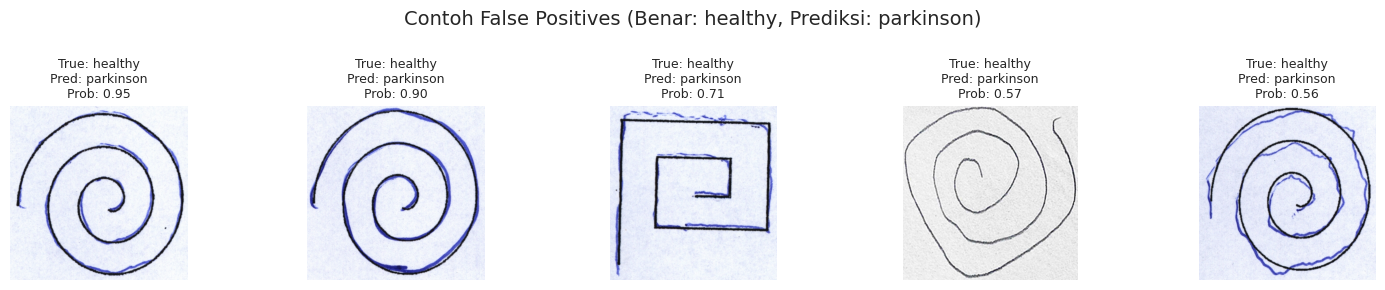


--- Memulai Analisis Kesalahan ---

Total sampel di Test Set: 94
Jumlah sampel yang salah diklasifikasikan: 11
Jumlah False Positives (True: healthy, Predicted: parkinson): 5
Jumlah False Negatives (True: parkinson, Predicted: healthy): 6

--- Contoh 5 False Positives (healthy yang diprediksi parkinson) ---


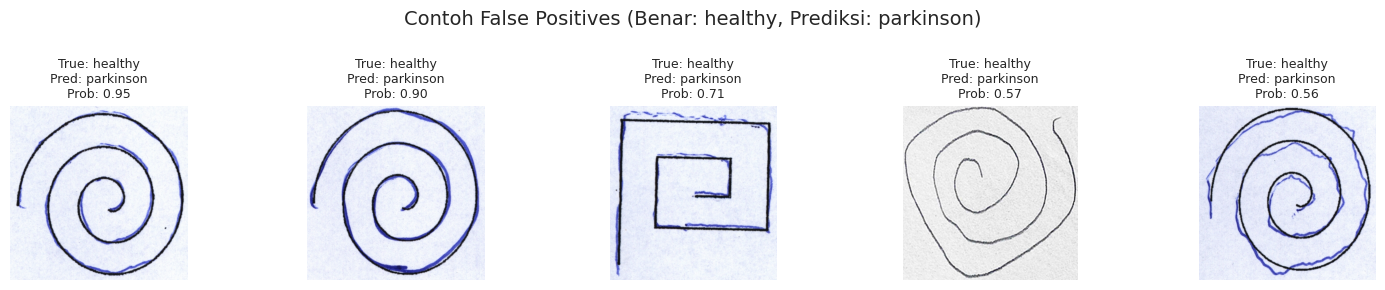


--- Contoh 6 False Negatives (parkinson yang diprediksi healthy) ---


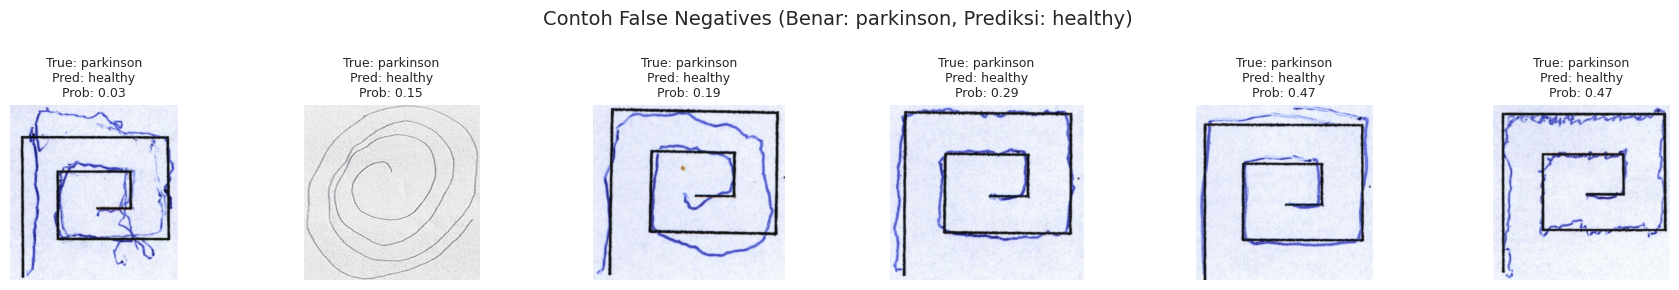

In [34]:
# --- Code untuk Melakukan Analisis Kesalahan ---
print("\n--- Memulai Analisis Kesalahan ---")

# Memperbaiki kondisi if: Menghapus redundansi 'in locals()'
if 'test_df' in locals() and not test_df.empty and \
   'y_true_final_np' in locals() and 'y_pred_final_labels' in locals() and \
   'y_pred_probs_final_np' in locals() and 'class_names_from_tf' in locals():

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image # Pastikan ini sudah diimpor di awal notebook
    import os # Pastikan ini sudah diimpor di awal notebook

    test_df_analysis = test_df.copy().reset_index(drop=True) # Reset index agar match numpy array
    test_df_analysis['true_label_int'] = y_true_final_np
    test_df_analysis['predicted_label_int'] = y_pred_final_labels
    test_df_analysis['predicted_prob'] = y_pred_probs_final_np
    test_df_analysis['is_correct'] = (test_df_analysis['true_label_int'] == test_df_analysis['predicted_label_int'])

    # Mapping label integer ke nama kelas
    int_to_label = {i: name for i, name in enumerate(class_names_from_tf)}
    test_df_analysis['true_label_name'] = test_df_analysis['true_label_int'].map(int_to_label)
    test_df_analysis['predicted_label_name'] = test_df_analysis['predicted_label_int'].map(int_to_label)

    # Identifikasi kesalahan
    misclassified_df = test_df_analysis[test_df_analysis['is_correct'] == False].copy()

    false_positives_df = misclassified_df[misclassified_df['true_label_int'] == 0] # True is Healthy (0)
    false_negatives_df = misclassified_df[misclassified_df['true_label_int'] == 1] # True is Parkinson (1)

    print(f"\nTotal sampel di Test Set: {len(test_df_analysis)}")
    print(f"Jumlah sampel yang salah diklasifikasikan: {len(misclassified_df)}")
    print(f"Jumlah False Positives (True: {class_names_from_tf[0]}, Predicted: {class_names_from_tf[1]}): {len(false_positives_df)}")
    print(f"Jumlah False Negatives (True: {class_names_from_tf[1]}, Predicted: {class_names_from_tf[0]}): {len(false_negatives_df)}")

    # --- Menampilkan Contoh False Positives ---
    print(f"\n--- Contoh {min(10, len(false_positives_df))} False Positives ({class_names_from_tf[0]} yang diprediksi {class_names_from_tf[1]}) ---")
    num_fp_to_display = min(10, len(false_positives_df))
    if num_fp_to_display > 0:
        # Urutkan FP berdasarkan probabilitas prediksi (paling yakin salah -> paling tidak yakin salah)
        fp_display_df = false_positives_df.sort_values(by='predicted_prob', ascending=False).head(num_fp_to_display)

        fig_fp, axes_fp = plt.subplots(1, num_fp_to_display, figsize=(num_fp_to_display * 3, 3))
        if num_fp_to_display == 1: axes_fp = [axes_fp] # Buat jadi list kalau hanya 1 subplot

        # Use enumerate to get a proper index for accessing axes
        for plot_idx, (_, row) in enumerate(fp_display_df.iterrows()):
            try:
                img_path = row['path']
                img = Image.open(img_path).convert('RGB')
                # Use plot_idx instead of the original DataFrame index i
                axes_fp[plot_idx].imshow(img)
                title = f"True: {row['true_label_name']}\nPred: {row['predicted_label_name']}\nProb: {row['predicted_prob']:.2f}"
                axes_fp[plot_idx].set_title(title, fontsize=9)
                axes_fp[plot_idx].axis('off')
            except Exception as e:
                 # Use plot_idx here as well
                 axes_fp[plot_idx].text(0.5, 0.5, f"Error: {e}", ha='center', va='center', fontsize=8)
                 axes_fp[plot_idx].set_title("Load Error", fontsize=9)
                 axes_fp[plot_idx].axis('off')

        plt.suptitle(f'Contoh False Positives (Benar: {class_names_from_tf[0]}, Prediksi: {class_names_from_tf[1]})', fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak terpotong
        plt.show()
    else:
        print("Tidak ada False Positives untuk ditampilkan.")


# --- Code untuk Melakukan Analisis Kesalahan ---
print("\n--- Memulai Analisis Kesalahan ---")

# Memperbaiki kondisi if: Menghapus redundansi 'in locals()'
if 'test_df' in locals() and not test_df.empty and \
   'y_true_final_np' in locals() and 'y_pred_final_labels' in locals() and \
   'y_pred_probs_final_np' in locals() and 'class_names_from_tf' in locals():

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image # Pastikan ini sudah diimpor di awal notebook
    import os # Pastikan ini sudah diimpor di awal notebook

    test_df_analysis = test_df.copy().reset_index(drop=True) # Reset index agar match numpy array
    test_df_analysis['true_label_int'] = y_true_final_np
    test_df_analysis['predicted_label_int'] = y_pred_final_labels
    test_df_analysis['predicted_prob'] = y_pred_probs_final_np
    test_df_analysis['is_correct'] = (test_df_analysis['true_label_int'] == test_df_analysis['predicted_label_int'])

    # Mapping label integer ke nama kelas
    int_to_label = {i: name for i, name in enumerate(class_names_from_tf)}
    test_df_analysis['true_label_name'] = test_df_analysis['true_label_int'].map(int_to_label)
    test_df_analysis['predicted_label_name'] = test_df_analysis['predicted_label_int'].map(int_to_label)

    # Identifikasi kesalahan
    misclassified_df = test_df_analysis[test_df_analysis['is_correct'] == False].copy()

    false_positives_df = misclassified_df[misclassified_df['true_label_int'] == 0] # True is Healthy (0)
    false_negatives_df = misclassified_df[misclassified_df['true_label_int'] == 1] # True is Parkinson (1)

    print(f"\nTotal sampel di Test Set: {len(test_df_analysis)}")
    print(f"Jumlah sampel yang salah diklasifikasikan: {len(misclassified_df)}")
    print(f"Jumlah False Positives (True: {class_names_from_tf[0]}, Predicted: {class_names_from_tf[1]}): {len(false_positives_df)}")
    print(f"Jumlah False Negatives (True: {class_names_from_tf[1]}, Predicted: {class_names_from_tf[0]}): {len(false_negatives_df)}")

    # --- Menampilkan Contoh False Positives ---
    print(f"\n--- Contoh {min(10, len(false_positives_df))} False Positives ({class_names_from_tf[0]} yang diprediksi {class_names_from_tf[1]}) ---")
    num_fp_to_display = min(10, len(false_positives_df))
    if num_fp_to_display > 0:
        # Urutkan FP berdasarkan probabilitas prediksi (paling yakin salah -> paling tidak yakin salah)
        fp_display_df = false_positives_df.sort_values(by='predicted_prob', ascending=False).head(num_fp_to_display)

        fig_fp, axes_fp = plt.subplots(1, num_fp_to_display, figsize=(num_fp_to_display * 3, 3))
        if num_fp_to_display == 1: axes_fp = [axes_fp] # Buat jadi list kalau hanya 1 subplot

        # Use enumerate to get a proper index for accessing axes
        for plot_idx, (_, row) in enumerate(fp_display_df.iterrows()):
            try:
                img_path = row['path']
                img = Image.open(img_path).convert('RGB')
                # Use plot_idx instead of the original DataFrame index i
                axes_fp[plot_idx].imshow(img)
                title = f"True: {row['true_label_name']}\nPred: {row['predicted_label_name']}\nProb: {row['predicted_prob']:.2f}"
                axes_fp[plot_idx].set_title(title, fontsize=9)
                axes_fp[plot_idx].axis('off')
            except Exception as e:
                 # Use plot_idx here as well
                 axes_fp[plot_idx].text(0.5, 0.5, f"Error: {e}", ha='center', va='center', fontsize=8)
                 axes_fp[plot_idx].set_title("Load Error", fontsize=9)
                 axes_fp[plot_idx].axis('off')

        plt.suptitle(f'Contoh False Positives (Benar: {class_names_from_tf[0]}, Prediksi: {class_names_from_tf[1]})', fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak terpotong
        plt.show()
    else:
        print("Tidak ada False Positives untuk ditampilkan.")


    # --- Menampilkan Contoh False Negatives ---
    print(f"\n--- Contoh {min(10, len(false_negatives_df))} False Negatives ({class_names_from_tf[1]} yang diprediksi {class_names_from_tf[0]}) ---")
    num_fn_to_display = min(10, len(false_negatives_df))

    if num_fn_to_display > 0:
        # Urutkan FN berdasarkan probabilitas prediksi (paling yakin salah -> paling tidak yakin salah)
        fn_display_df = false_negatives_df.sort_values(by='predicted_prob', ascending=True).head(num_fn_to_display)

        fig_fn, axes_fn = plt.subplots(1, num_fn_to_display, figsize=(num_fn_to_display * 3, 3))
        if num_fn_to_display == 1: axes_fn = [axes_fn] # Buat jadi list kalau hanya 1 subplot

        # Use enumerate to get a proper index for accessing axes
        for plot_idx, (_, row) in enumerate(fn_display_df.iterrows()):
            try:
                img_path = row['path']
                img = Image.open(img_path).convert('RGB')
                # Use plot_idx instead of the original DataFrame index i
                axes_fn[plot_idx].imshow(img)
                title = f"True: {row['true_label_name']}\nPred: {row['predicted_label_name']}\nProb: {row['predicted_prob']:.2f}"
                axes_fn[plot_idx].set_title(title, fontsize=9)
                axes_fn[plot_idx].axis('off')
            except Exception as e:
                 # Use plot_idx here as well
                 axes_fn[plot_idx].text(0.5, 0.5, f"Error: {e}", ha='center', va='center', fontsize=8)
                 axes_fn[plot_idx].set_title("Load Error", fontsize=9)
                 axes_fn[plot_idx].axis('off')

        plt.suptitle(f'Contoh False Negatives (Benar: {class_names_from_tf[1]}, Prediksi: {class_names_from_tf[0]})', fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak terpotong
        plt.show()
    else:
        print("Tidak ada False Negatives untuk ditampilkan.")

else:
    print("Variabel yang diperlukan untuk analisis kesalahan tidak tersedia. Pastikan tahap evaluasi sudah dijalankan dengan benar.")

### 7.5 Membandingkan hasil percobaan

In [35]:
# --- Code untuk Membandingkan Hasil Eksperimen MLflow ---
print("--- Memulai Perbandingan Eksperimen MLflow ---")

EXPERIMENT_NAME_TO_COMPARE = "Parkinson_Detection_Capstone_Final_Runs"
METRIC_TO_SORT_BY = "metrics.test_accuracy_final"

try:
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME_TO_COMPARE)

    if experiment is None:
        print(f"Eksperimen '{EXPERIMENT_NAME_TO_COMPARE}' tidak ditemukan.")
        print("Silakan periksa kembali nama eksperimen MLflow Anda.")
    else:
        experiment_id = experiment.experiment_id
        print(f"Mencari run di Eksperimen MLflow: '{EXPERIMENT_NAME_TO_COMPARE}' (ID: {experiment_id})")

        all_runs_df = mlflow.search_runs(
            experiment_ids=[experiment_id],
            order_by=[f"{METRIC_TO_SORT_BY} DESC"] # Urutkan menurun (DESC) berdasarkan metrik
        )

        if all_runs_df.empty:
            print(f"Tidak ada run ditemukan di eksperimen '{EXPERIMENT_NAME_TO_COMPARE}'.")
        else:
            print(f"\nTotal {len(all_runs_df)} run ditemukan.")

            display_cols = [
                'run_id',
                'tags.mlflow.runName',
                METRIC_TO_SORT_BY,
                'metrics.test_loss_final',
                'metrics.test_precision_final',
                'metrics.test_recall_final',
                'params.initial_lr',
                'params.dense_units',
                'params.dropout_1',
                'params.dropout_2',
                'params.l2_reg',
                'params.epochs', # Jumlah epoch target
                'metrics.actual_epochs_trained', # Jumlah epoch yang benar-benar dilatih (jika menggunakan early stopping)
                'start_time',
                'end_time'
            ]

            actual_display_cols = [col for col in display_cols if col in all_runs_df.columns]

            print(f"\n--- Ringkasan Hasil Eksperimen '{EXPERIMENT_NAME_TO_COMPARE}' (Diurutkan berdasarkan {METRIC_TO_SORT_BY}) ---")

            print(all_runs_df[actual_display_cols].to_string())

            best_run = all_runs_df.iloc[0]
            print("\n--- Run Terbaik ---")
            for col in actual_display_cols:
                print(f"{col}: {best_run[col]}")

except Exception as e:
    print(f"Terjadi kesalahan saat membandingkan eksperimen MLflow: {e}")

print("\n--- Selesai Perbandingan Eksperimen MLflow ---")

--- Memulai Perbandingan Eksperimen MLflow ---
Mencari run di Eksperimen MLflow: 'Parkinson_Detection_Capstone_Final_Runs' (ID: 501962634581372297)

Total 1 run ditemukan.

--- Ringkasan Hasil Eksperimen 'Parkinson_Detection_Capstone_Final_Runs' (Diurutkan berdasarkan metrics.test_accuracy_final) ---
                             run_id                              tags.mlflow.runName  metrics.test_accuracy_final  metrics.test_loss_final  metrics.test_precision_final  metrics.test_recall_final params.initial_lr params.dense_units params.dropout_1 params.dropout_2 params.l2_reg params.epochs  metrics.actual_epochs_trained                       start_time                         end_time
0  00d0a21d9fde4912b59a8192f6a1ea53  LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore                     0.882979                 0.603729                      0.926471                   0.913043            0.0005                 64              0.4              0.3         0.002            60            

## 8. Save Model

In [46]:
# --- Kode untuk Mendefinisikan Arsitektur Model ---
print("\n--- Mendefinisikan Arsitektur Model ---")

# Pastikan variabel IMG_SIZE sudah terdefinisi dari sel sebelumnya
# Jika tidak, definisikan di sini: IMG_SIZE = (224, 224)
if 'IMG_SIZE' not in locals():
    IMG_SIZE = (224, 224)
    print(f"Menggunakan IMG_SIZE default: {IMG_SIZE}")


# --- Bangun Model ---
# Muat MobileNetV2 pre-trained di ImageNet, tanpa layer top
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,), # Input shape harus sesuai dengan ukuran gambar (tinggi, lebar, channel)
    include_top=False,           # Tidak menyertakan layer klasifikasi asli MobileNetV2
    weights='imagenet'           # Menggunakan bobot dari pelatihan di ImageNet
)

base_model.trainable = False

# Buat model Sequential dengan menambahkan layer kustom di atas base model
model = tf.keras.models.Sequential([
    # Layer dasar MobileNetV2
    base_model,
    # Layer Global Average Pooling untuk meratakan output dari base model
    tf.keras.layers.GlobalAveragePooling2D(),
    # Layer Dropout untuk regularisasi (mengurangi overfitting)
    tf.keras.layers.Dropout(0.4), # Contoh nilai dropout, sesuaikan dengan parameter terbaik Anda
    # Layer Dense (fully connected)
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)), # Contoh Dense units dan L2 reg
    # Layer Batch Normalization (membantu stabilitas pelatihan)
    tf.keras.layers.BatchNormalization(),
    # Layer Dropout kedua (opsional)
    tf.keras.layers.Dropout(0.3), # Contoh nilai dropout kedua
    # Layer output tunggal dengan aktivasi sigmoid untuk klasifikasi biner
    tf.keras.layers.Dense(1, activation='sigmoid')
], name="parkinson_detection_model_architecture") # Beri nama model

# Tampilkan ringkasan arsitektur model
model.summary()

print("\n--- Arsitektur Model Telah Didefinisikan ---")


--- Mendefinisikan Arsitektur Model ---


Model: "parkinson_detection_model_architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,289 (8.93 MB)

 Trainable params: 82,177 (321.00 KB)

 Non-trainable params: 2,258,112 (8.61 MB)


--- Arsitektur Model Telah Didefinisikan ---


In [49]:
# --- Kode untuk Mendefinisikan, Menyimpan (dalam .h5), Memuat, dan Memprediksi dengan Model ---
print("\n--- Memulai Proses Model (.h5) ---")

# Impor modul yang diperlukan (pastikan sudah ada di awal notebook)
import tensorflow as tf
import numpy as np
import os
from PIL import Image # Untuk memuat gambar

# Pastikan variabel IMG_SIZE sudah terdefinisi dari sel sebelumnya
# Jika tidak, definisikan di sini: IMG_SIZE = (224, 224)
if 'IMG_SIZE' not in locals():
    IMG_SIZE = (224, 224)
    print(f"Menggunakan IMG_SIZE default: {IMG_SIZE}")

# Pastikan class_names_from_tf sudah terdefinisi
if 'class_names_from_tf' not in locals():
     # Default/contoh jika belum terdefinisi dari tf.keras.utils.image_dataset_from_directory
     class_names_from_tf = ['healthy', 'parkinson']
     print(f"Menggunakan class_names_from_tf default: {class_names_from_tf}")


# --- 1. Mendefinisikan Arsitektur Model ---
print("\n--- 1. Mendefinisikan Arsitektur Model ---")

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False # Biasanya base model dibekukan saat awal transfer learning

# Define the same architecture as used in training
# (You might want to make these parameters configurable or use the best parameters found)
model_for_h5 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4), # Sesuaikan dengan parameter terbaik
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)), # Sesuaikan dengan parameter terbaik
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), # Sesuaikan dengan parameter terbaik
    tf.keras.layers.Dense(1, activation='sigmoid')
], name="parkinson_detection_model_h5")

model_for_h5.summary()
print("Arsitektur model untuk .h5 telah didefinisikan.")

# --- 2. Kompilasi Model (Opsional untuk saving weights only, tapi baiknya dilakukan) ---

model_for_h5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), # Sesuaikan dengan LR terbaik
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
print("\nModel telah dikompilasi.")


# --- 3. Memuat Bobot dari Model yang Telah Dilatih ---

trained_model_source = None
if 'model_for_final_analysis' in locals() and model_for_final_analysis is not None and not getattr(model_for_final_analysis, '_is_graph_network', False):
     # Ini mungkin MLflow pyfunc wrapper, coba akses Keras model di dalamnya
     if hasattr(model_for_final_analysis, '_model_impl') and hasattr(model_for_final_analysis._model_impl, 'keras_model'):
        trained_model_source = model_for_final_analysis._model_impl.keras_model
        print("\nMenggunakan bobot dari Keras model di dalam MLflow pyfunc.")
     elif hasattr(model_for_final_analysis, '_model_impl') and isinstance(model_for_final_analysis._model_impl, tf.keras.Model):
        trained_model_source = model_for_final_analysis._model_impl
        print("\nMenggunakan bobot dari Keras model di dalam MLflow pyfunc (alt).")
     elif isinstance(model_for_final_analysis, tf.keras.Model): # Jika ternyata model_for_final_analysis adalah Keras Model murni
         trained_model_source = model_for_final_analysis
         print("\nMenggunakan bobot dari model_for_final_analysis (Keras Model murni).")

elif 'model_for_final_analysis' in locals() and isinstance(model_for_final_analysis, tf.keras.Model):
     trained_model_source = model_for_final_analysis
     print("\nMenggunakan bobot dari model_for_final_analysis (Keras Model).")

elif 'model_best_in_loop' in locals() and model_best_in_loop is not None:
    trained_model_source = model_best_in_loop
    print("\nMenggunakan bobot dari model_best_in_loop.")
else:
    print("\nPERINGATAN: Tidak dapat menemukan model terlatih (model_best_in_loop atau model_for_final_analysis Keras).")
    print("Model yang disimpan ke .h5 TIDAK AKAN memiliki bobot terlatih.")
    print("Anda perlu melatih model_for_h5 atau memuat bobot dari checkpoint sebelum saving.")

if trained_model_source:
    try:
        # Salin bobot dari model yang sudah terlatih ke model_for_h5
        model_for_h5.set_weights(trained_model_source.get_weights())
        print("Bobot dari model terlatih berhasil disalin ke model_for_h5.")
    except Exception as e:
        print(f"Gagal menyalin bobot: {e}")
        print("Pastikan arsitektur model_for_h5 SAMA PERSIS dengan model yang terlatih.")
        print("Model yang disimpan ke .h5 MUNGKIN TIDAK memiliki bobot terlatih.")


# --- 4. Menyimpan Model dalam Format .h5 ---
print("\n--- 4. Menyimpan Model dalam Format .h5 ---")

# Nama file .h5
h5_filename = "parkinson_detection_model.h5"
h5_filepath = os.path.join("./exported_models", h5_filename) # Simpan di direktori exported_models

# Buat direktori exported_models jika belum ada
os.makedirs("./exported_models", exist_ok=True)

print(f"Menyimpan model dalam format .h5 ke: {h5_filepath}")

try:
    # Menyimpan seluruh model (arsitektur, bobot, konfigurasi pelatihan, status optimizer - jika dikompilasi)
    model_for_h5.save(h5_filepath)
    print("Model berhasil disimpan dalam format .h5.")

    from google.colab import files
    print(f"Mengunduh file: {h5_filename}")
    files.download(h5_filepath)
    print("Permintaan unduhan dikirim. Periksa browser Anda.")

except Exception as e:
    print(f"Gagal menyimpan model dalam format .h5: {e}")
    print("Pastikan direktori ./exported_models bisa ditulis.")


--- Memulai Proses Model (.h5) ---

--- 1. Mendefinisikan Arsitektur Model ---


Model: "parkinson_detection_model_h5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,289 (8.93 MB)

 Trainable params: 82,177 (321.00 KB)

 Non-trainable params: 2,258,112 (8.61 MB)

Arsitektur model untuk .h5 telah didefinisikan.

Model telah dikompilasi.

Menggunakan bobot dari Keras model di dalam MLflow pyfunc.


Bobot dari model terlatih berhasil disalin ke model_for_h5.

--- 4. Menyimpan Model dalam Format .h5 ---
Menyimpan model dalam format .h5 ke: ./exported_models/parkinson_detection_model.h5
Model berhasil disimpan dalam format .h5.
Mengunduh file: parkinson_detection_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Permintaan unduhan dikirim. Periksa browser Anda.



--- 5. & 6. Memuat Model .h5 dan Memproses Gambar untuk Prediksi ---
Memuat model dari ./exported_models/parkinson_detection_model.h5...


Model berhasil dimuat dari .h5.

Menggunakan gambar sampel dari test_df: /content/drive/MyDrive/parkinson/parkinson_dataset/meander/parkinson/meander_parkinson_165.jpg
Label Asli Sampel: parkinson
Memproses gambar sampel: /content/drive/MyDrive/parkinson/parkinson_dataset/meander/parkinson/meander_parkinson_165.jpg
Menampilkan gambar sampel...


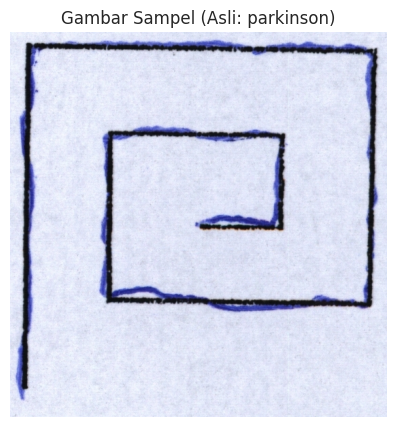

Melakukan prediksi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Probabilitas (kelas 'parkinson'): 0.8495
Kelas Prediksi: parkinson
Kelas Asli: parkinson

--- Selesai Proses Model (.h5) ---


In [48]:
# --- Lanjutan dari Kode Prediksi dengan .h5 ---

# ... (Kode sebelumnya untuk mendefinisikan, menyimpan, dan memuat model .h5) ...

# --- 5. & 6. Memuat Model .h5 dan Memproses Gambar untuk Prediksi ---
print("\n--- 5. & 6. Memuat Model .h5 dan Memproses Gambar untuk Prediksi ---")

loaded_model_h5 = None
if os.path.exists(h5_filepath):
    print(f"Memuat model dari {h5_filepath}...")
    try:
        # Memuat model dari file .h5
        loaded_model_h5 = tf.keras.models.load_model(h5_filepath)
        print("Model berhasil dimuat dari .h5.")

        # Sekarang Anda bisa menggunakan loaded_model_h5 untuk prediksi

        # Contoh: Memprediksi satu gambar (Anda perlu mengganti ini dengan path gambar yang valid)
        sample_image_path = None
        if 'test_df' in locals() and not test_df.empty:
            sample_image_path = test_df.iloc[0]['path'] # Ambil path gambar pertama dari test_df
            sample_true_label = test_df.iloc[0]['labels_main']
            print(f"\nMenggunakan gambar sampel dari test_df: {sample_image_path}")
            print(f"Label Asli Sampel: {sample_true_label}")
        else:
            print("\nVariabel 'test_df' tidak ditemukan atau kosong.")
            print("Tidak dapat melakukan prediksi sampel. Silakan sediakan path gambar yang valid.")
            # Contoh path manual jika tidak ada test_df (ganti dengan path nyata):
            sample_image_path = "/content/drive/MyDrive/parkinson/parkinson_dataset/spiral/parkinson/spiral_parkinson_003.jpg"
            sample_true_label = "healthy" # Sesuaikan dengan label gambar

        if sample_image_path and os.path.exists(sample_image_path):
            print(f"Memproses gambar sampel: {sample_image_path}")
            try:
                # Memuat dan memproses gambar untuk PREDIKSI
                img = Image.open(sample_image_path).convert('RGB') # Pastikan RGB
                img_resized = img.resize(IMG_SIZE) # Resize gambar
                img_array = np.array(img_resized) # Konversi ke numpy array
                img_array = np.expand_dims(img_array, axis=0) # Tambahkan batch dimension

                # Preprocessing khusus MobileNetV2
                preprocessed_img = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

                # --- Menampilkan Gambar Sampel ---
                print("Menampilkan gambar sampel...")
                plt.figure(figsize=(5, 5))
                # Tampilkan gambar asli atau yang di-resize sebelum preprocessing MobileNetV2
                plt.imshow(img) # Bisa juga plt.imshow(img_resized)
                plt.title(f"Gambar Sampel (Asli: {sample_true_label if 'sample_true_label' in locals() else 'Tidak Diketahui'})")
                plt.axis('off')
                plt.show() # Pastikan show() dipanggil

                # --- 7. Melakukan Prediksi ---
                print("Melakukan prediksi...")
                predictions = loaded_model_h5.predict(preprocessed_img)
                probability = predictions[0][0] # Ambil probabilitas untuk kelas positif (Parkinson)

                # Tentukan kelas prediksi berdasarkan threshold (misal 0.5)
                predicted_class_int = 1 if probability > 0.5 else 0
                predicted_class_name = class_names_from_tf[predicted_class_int]

                print(f"\nProbabilitas (kelas '{class_names_from_tf[1]}'): {probability:.4f}")
                print(f"Kelas Prediksi: {predicted_class_name}")
                if 'sample_true_label' in locals():
                    print(f"Kelas Asli: {sample_true_label}")


            except Exception as e_pred:
                print(f"Error saat memproses gambar atau prediksi: {e_pred}")
        elif sample_image_path:
             print(f"Gambar sampel tidak ditemukan di path: {sample_image_path}")


    except Exception as e_load:
        print(f"Gagal memuat model dari .h5: {e_load}")
        print("Pastikan file .h5 adalah model Keras yang valid.")
else:
    print(f"File model .h5 tidak ditemukan di: {h5_filepath}")
    print("Tidak dapat memuat model atau melakukan prediksi sampel.")


print("\n--- Selesai Proses Model (.h5) ---")